# Définition des descripteurs pour le mapping des paramètres de contrôle de l'instrument virtuel

**Fonctions utiles :**
```
from descripteurs import Classifier_son, Classifier_regimes, Classifier_justesse
```

### Liste des descripteurs : 

**Un son est produit**

Le descripteur est le moyennage des amplitudes sur la fin des oscillations (source : Missoum, Vergez & Doc, 2014) :

$$
\begin{equation}
D_{son} = \frac{1}{N_{2/3}} \sum_{N_{2/3}} p(t_i)
\end{equation}
\tag{1}
$$

Classification :
- D_{son} > $\epsilon_1$ : oscillations 
- D_{son} $\leq$ $\epsilon_1$ : régime statique

-> $\epsilon_1$ à déterminer

**Régime d'oscillation**

Distinction entre régime périodique et régime quasi-périodique. Pour cela on utilise la forme de l'enveloppe de puissance de la pression au niveau de l'embouchure. 

$$
\begin{equation}
D_{régime} = \frac{Var(power)}{<power>}
\end{equation}
\tag{2}
$$

Dans le cours de Christophe, $\epsilon_2 = 10^{-2}$

**Justesse de la note**

La justesse est évaluée en cents (réf : Missoum, Vergez & Doc, 2014). 
$$
\begin{equation}
D_{note} = 1200 \log_2\left( \frac{f_{act}}{f_{ref}} \right)
\tag{3}
\end{equation}
$$
Le seuil pour la classification $\epsilon_3$ est fixé à 5 cents d'écart entre la fréquence de référence et la fréquence produite calculée à partir de l'algorithme de Yin dans l'article. Ici, on remplace cet algorithme temporel par la méthode du produit spectral (fait l'hypothèse qu'il existe de l'énergie dans le spectre en $f_0$, plus robuste que la somme spectrale.)

**Longueur du transitoire d'attaque**

idées de ressource :
- thèse victor Salvador-castrillo (violon), 2024
- evangelista, acquilino, 2025
- Peeters et al., The Timbre Toolbox ..., 2010
- Rodet, Jaillet : Detection and modeling of fast attack transients

**Bifurcation directe ou indirecte à l'extinction et au seuil d'oscillation**

Taillard et Kergomard, 2013

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from time import time
from mpl_toolkits.mplot3d import Axes3D
# import matplotlib.ticker as mticker
from clarinette_classe import Clarinette_DelayLine

Temps d'exécution (s) : 85.46718621253967


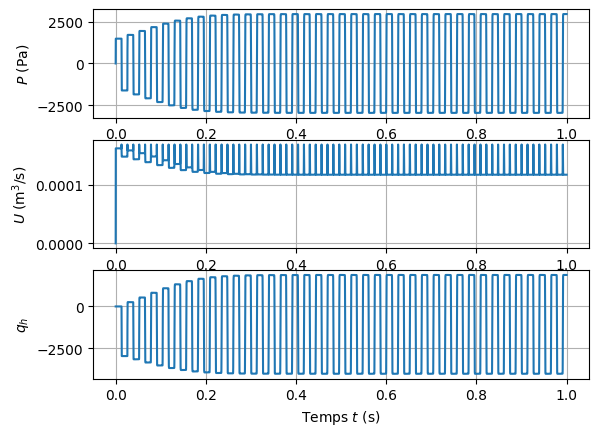

In [52]:
# Test de clarinette_classe + signal test

L = 0.58               # longueur du résonateur (m)
T_deg = 20             # température (°C)
w = 1.3*10**(-2)       # largeur du canal d'anche (m)
H = 10**(-3)           # ouverture d'anche au repos (m)
P_M = 10*10**3         # pression de plaquage (Pa)
gamma = 0.38           # pression dans la bouche adimensionnée --> entre 1/3 et 1/2
zeta = 0.4            # paramètre d'ouverture d'anche adimensionné --> entre 0.2 et 0.6
T_sec = 1         # durée simulée (s)
fs = 44100

clarinette = Clarinette_DelayLine(L = L, temperature = T_deg, w =  w, H = H, P_M = P_M)
clarinette.params_controle_musicien(gamma,zeta)
clarinette.affiche_result(T_sec, fs)


Temps d'exécution (s) : 5.644119024276733


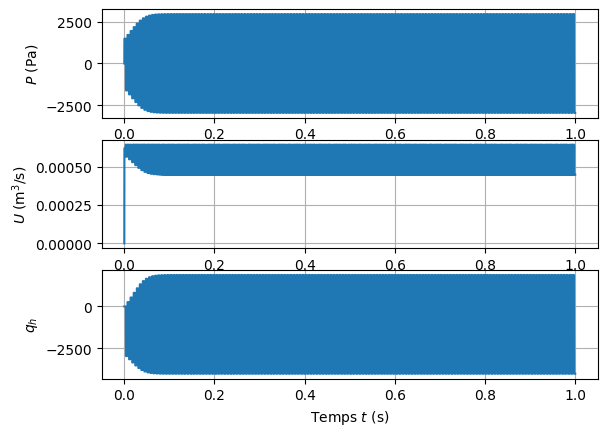

In [ ]:
# # Clarinette de Coline : 

# # PARAMETRES PHYSIQUES ET VARIABLES

# T_sec = 1         # durée simulée (s)

# # Paramètres physiques

# T_deg = 20             # température (°C)
# T_K = 273.15 + T_deg   # température (K)
# c = 20.05*np.sqrt(T_K) # vitesse du son (m/s)
# rho = 1.292*273.15/T_K # masse volumique de l'air (kg/m^3)
# lv = 4e-8
# lt = 5.6e-8
# cp_over_cv = 1.402

# # Paramètres d'anche et de résonateur

# gamma = 0.38           # pression dans la bouche adimensionnée --> entre 1/3 et 1/2
# zeta = 0.4            # paramètre d'ouverture d'anche adimensionné --> entre 0.2 et 0.6

# H = 10**(-3)           # ouverture d'anche au repos (m)
# w = 1.3*10**(-2)       # largeur du canal d'anche (m)
# P_M = 10*10**3         # pression de plaquage (Pa)
# Ks = P_M / H           # raideur anche (Pa/m)
# P_m  = gamma * P_M      # pression dans la bouche (Pa)
# U_A = w*H*np.sqrt(2/rho*P_M)
# Zc = zeta*P_M/U_A      # impédance caractéristique (kg/s)
# S = rho*c/Zc           # section du résonateur (m^2)
# R = np.sqrt(S/np.pi)   # rayon du résonateur (m)
# L = 0.58               # longueur du résonateur (m)
# alpha = 2/(R*c**(3/2)) * ( np.sqrt(lv) + (cp_over_cv-1)*np.sqrt(lt))

# # Paramètres utiles pour la simulation

# T = 2*L/c               # temps de parcours d'un aller-retour (s)
# #delta_t = T/128         # pas de temps (s)
# #fs = int(np.rint(1/delta_t)) # fréquence d'échantillonage
# fs = 44100*2
# delta_t = 1/fs

# # FONCTIONS

# # Caractéristique non-linéaire
# @njit
# def F(P, gamma, zeta, Zc, P_M = 10*10**3):
#     """
#     Caractéristique non-linéaire F telle que u = F(P_m-p)

#     Parameters
#     ----------
#         P : float, pression dans le bec (Pa)
#         gamma : float, pression dans la bouche adimensionnée
#         zeta : float, paramètre d'ouverture d'anche adimensionné
#         P_M : float, pression de plaquage
#         Zc : float, impédance caractéristique
#     Returns
#     -------
#         U : float, débit volumique dans le bec
#     """
#     p = P/P_M # pression adimensionnée
#     if np.abs(gamma-p) <= 1:
#         u = zeta * (1+p-gamma) * np.sqrt(np.abs(gamma-p)) * (gamma-p)/np.abs(gamma-p) # débit adimensionné
#     else :
#         u = 0
#     U = u*P_M/Zc # débit dimensionné
#     return U

# @njit
# def func_dicho(P, params):
#     """
#     Fonction dont on veut trouver le zéro par dichotomie
    
#     Parameters
#     ----------
#         P : float, valeur de la pression dans le bec à laquelle on évalue la fonction
#         params : array
#     """
#     qh, Zc, gamma, zeta = params[0], params[1], params[2], params[3]
#     return F(P, gamma, zeta, Zc) - 1/Zc*(P-qh)

# @njit
# def dichotomie(func, params, a, b, n, tol=1e-9):
#     """ 
#     Trouver l'abcisse m tel que func(m) = 0 par dichotomie
    
#     Parameters
#     ----------
#         func : fonction, fonction dont on cherche l'annulation
#         params : array, paramètres d'entrée de la fonction
#         a : float, borne minimale de l'intervalle de recherche
#         b : float, borne maximale de l'intervalle de recherche
#         tol : float, tolérance de précision sur la valeur de l'abcisse obtenue
        
#     Returns
#     -------
#         m : float, abcisse pour laquelle la fonction s'annule
#     """
    
#     if func(a,params)*func(b,params) > 0:
#         #print("Mauvais choix des bornes de l'intervalle, n=",n)
#         return (a+b)/2
#     else :
#         m = (a+b)/2
        
#         while np.abs(a-b) > tol:
#             if func(m,params) == 0.:
#                 return m
#             elif func(a,params)*func(m,params) > 0:
#                 a = m
#             else :
#                 b = m
#             m = (a+b)/2
            
#         return m
    

# # BOUCLE TEMPORELLE

# D = int(np.rint(2*L/c * fs))
# beta = 2*R/(c/fs)
# n1 = 0.167
# d1 = 1.393
# d2 = 0.457

# @njit
# def execution(T_sec, delta_t, gamma, zeta, Zc):

#     temps = np.arange(0, T_sec, delta_t)
#     N = len(temps)
    
#     # Initialisation
#     U, P, P_ext, qh = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    
#     # Boucle
#     for n in range(1,N):
    
#         # calcul de qh à l'instant
#         if n >= 2 :
#             qh_prev2 = qh[n-2]
#         else : 
#             qh_prev2 = 0
        
#         if n >= D :
#             q0_D = P[n-D] + Zc*U[n-D]
#         else :
#             q0_D = 0
            
#         if n >= D+1 :
#             q0_D1 = P[n-D-1] + Zc*U[n-D-1]
#         else :
#             q0_D1 = 0
        
#         if n >= D+2:
#             q0_D2 = P[n-D-2] + Zc*U[n-D-2]
#         else :
#             q0_D2 = 0
            
#         qh[n] = -2*(1-d2*beta**2)*qh[n-1] - (1 - d1*beta + d2*beta**2)*qh_prev2 \
#             - (1+n1*beta)*q0_D - 2*q0_D1 - (1-n1*beta)*q0_D2
#         qh[n] /= (1 + d1*beta + d2*beta**2)
        
#         # calcul de q et f à l'instant t
#         # trouver l'intersection entre la courbe F(P) et la droite U = 1/Zc*(P-qh) par dichotomie
#         P[n] = dichotomie(func_dicho, [qh[n],Zc, gamma, zeta], -P_M, P_M, n)
#         U[n] = F(P[n], gamma, zeta, Zc)
#         P_ext[n] = (P[n]+U[n] - (P[n-1]+U[n-1])) / delta_t
        
#     return temps, U, P, P_ext, qh

# start = time()
# temps, U, P, P_ext, qh = execution(T_sec, delta_t, gamma, zeta, Zc)
# stop = time()
# print("Temps d'exécution (s) :", stop-start)
    
# # AFFICHAGE

# plt.figure()
# plt.subplot(311)
# plt.plot(temps,P)
# plt.ylabel(r"$P$ (Pa)")
# plt.grid()

# plt.subplot(312)
# plt.plot(temps,U)
# plt.ylabel(r"$U$ (m$^3$/s)")
# plt.grid()

# plt.subplot(313)
# plt.plot(temps,qh)
# plt.xlabel(r"Temps $t$ (s)")
# plt.ylabel(r"$q_h$")
# plt.grid()
# plt.show()

In [126]:
###############################################################################
                    # MODELE PHYSIQUE DE CLARINETTE

           # D'après l"article d'Ollivier, Dalmont, Kergomard
      # Fonction de réflexion d'après Guillemain, Kergomard, Voinier
###############################################################################

# PARAMETRES PHYSIQUES ET VARIABLES

T_sec = 1         # durée simulée (s)

# Paramètres physiques

T_deg = 20             # température (°C)
T_K = 273.15 + T_deg   # température (K)
c = 20.05*np.sqrt(T_K) # vitesse du son (m/s)
rho = 1.292*273.15/T_K # masse volumique de l'air (kg/m^3)
lv = 4e-8
lt = 5.6e-8
cp_over_cv = 1.402

# Paramètres d'anche et de résonateur

gamma = 0.38           # pression dans la bouche adimensionnée --> entre 1/3 et 1/2
zeta = 0.4            # paramètre d'ouverture d'anche adimensionné --> entre 0.2 et 0.6

H = 10**(-3)           # ouverture d'anche au repos (m)
w = 1.3*10**(-2)       # largeur du canal d'anche (m)
P_M = 10*10**3         # pression de plaquage (Pa)
Ks = P_M / H           # raideur anche (Pa/m)
P_m = gamma * P_M      # pression dans la bouche (Pa)
U_A = w*H*np.sqrt(2/rho*P_M)
Zc = zeta*P_M/U_A      # impédance caractéristique (kg/s)
S = rho*c/Zc           # section du résonateur (m^2)
R = np.sqrt(S/np.pi)   # rayon du résonateur (m)
L = 0.58               # longueur du résonateur (m)
a = R
alpha = 2/(R*c**(3/2)) * ( np.sqrt(lv) + (cp_over_cv-1)*np.sqrt(lt))

# Paramètres utiles pour la simulation

T = 2*L/c               # temps de parcours d'un aller-retour (s)
#delta_t = T/128         # pas de temps (s)
#fs = int(np.rint(1/delta_t)) # fréquence d'échantillonage
fs = 44100*2
delta_t = 1/fs

# FONCTIONS

# Caractéristique non-linéaire
@njit
def F(P, gamma, zeta, L, P_M, Zc):
    """
    Caractéristique non-linéaire F telle que u = F(P_m-p)

    Parameters
    ----------
        P : float, pression dans le bec (Pa)
        gamma : float, pression dans la bouche adimensionnée
        zeta : float, paramètre d'ouverture d'anche adimensionné
        P_M : float, pression de plaquage
        Zc : float, impédance caractéristique
    Returns
    -------
        U : float, débit volumique dans le bec
    """
    p = P/P_M # pression adimensionnée
    if np.abs(gamma-p) <= 1:
        u = zeta * (1+p-gamma) * np.sqrt(np.abs(gamma-p)) * (gamma-p)/np.abs(gamma-p) # débit adimensionné
    else :
        u = 0
    U = u*P_M/Zc # débit dimensionné
    return U

@njit
def func_dicho(P, params):
    """
    Fonction dont on veut trouver le zéro par dichotomie

    Parameters
    ----------
        P : float, valeur de la pression dans le bec à laquelle on évalue la fonction
        params : array
    """
    qh, gamma, zeta, L, P_M, Zc = params[0], params[1], params[2], params[3], params[4], params[5]
    return F(P, gamma, zeta, L, P_M, Zc) - 1/Zc*(P-qh)

@njit
def dichotomie(func, params, a, b, n, tol=1e-9):
    """
    Trouver l'abcisse m tel que func(m) = 0 par dichotomie

    Parameters
    ----------
        func : fonction, fonction dont on cherche l'annulation
        params : array, paramètres d'entrée de la fonction
        a : float, borne minimale de l'intervalle de recherche
        b : float, borne maximale de l'intervalle de recherche
        tol : float, tolérance de précision sur la valeur de l'abcisse obtenue

    Returns
    -------
        m : float, abcisse pour laquelle la fonction s'annule
    """

    if func(a,params)*func(b,params) > 0:
        #print("Mauvais choix des bornes de l'intervalle, n=",n)
        return (a+b)/2
    else :
        m = (a+b)/2

        while np.abs(a-b) > tol:
            if func(m,params) == 0.:
                return m
            elif func(a,params)*func(m,params) > 0:
                a = m
            else :
                b = m
            m = (a+b)/2

        return m


# BOUCLE TEMPORELLE

D = int(np.rint(2*L/c * fs))
beta = 2*R/(c/fs)
n1 = 0.167
d1 = 1.393
d2 = 0.457

@njit
def execution(T_sec, delta_t, gamma, zeta, L, P_M, Zc):

    S = rho*c/Zc           # section du résonateur (m^2)
    R = np.sqrt(S/np.pi)   # rayon du résonateur (m)
    D = int(np.rint(2*L/c * fs))
    beta = 2*R/(c/fs)

    temps = np.arange(0, T_sec, delta_t)
    N = len(temps)

    # Initialisation
    U, P, P_ext, qh = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)

    # Boucle
    for n in range(1,N):

        # calcul de qh à l'instant
        if n >= 2 :
            qh_prev2 = qh[n-2]
        else :
            qh_prev2 = 0

        if n >= D :
            q0_D = P[n-D] + Zc*U[n-D]
        else :
            q0_D = 0

        if n >= D+1 :
            q0_D1 = P[n-D-1] + Zc*U[n-D-1]
        else :
            q0_D1 = 0

        if n >= D+2:
            q0_D2 = P[n-D-2] + Zc*U[n-D-2]
        else :
            q0_D2 = 0

        qh[n] = -2*(1-d2*beta**2)*qh[n-1] - (1 - d1*beta + d2*beta**2)*qh_prev2 \
            - (1+n1*beta)*q0_D - 2*q0_D1 - (1-n1*beta)*q0_D2
        qh[n] /= (1 + d1*beta + d2*beta**2)

        # calcul de q et f à l'instant t
        # trouver l'intersection entre la courbe F(P) et la droite U = 1/Zc*(P-qh) par dichotomie
        P[n] = dichotomie(func_dicho, [qh[n], gamma, zeta, L, P_M, Zc], -P_M, P_M, n)
        U[n] = F(P[n], gamma, zeta, L, P_M, Zc)
        P_ext[n] = (P[n]+U[n] - (P[n-1]+U[n-1])) / delta_t

    return temps, U, P, P_ext, qh


def simulation(T_sec, delta_t, gamma, zeta, L, P_M, Zc, ret_time=False): #Remise en forme pour pouvoir cartographier ensuite
    start = time()
    _, _, P, _, _ = execution(T_sec, delta_t, gamma, zeta, L, P_M, Zc)
    stop = time()
    if ret_time:
        return P, stop-start
    else:
        return P

In [127]:
class LatinSquare : 

    def __init__(self, n_data, u, dims = 2):
        from scipy.stats import qmc
        self.n_data = n_data
        self.l = 1
        self.u = u
        self.dims = dims
        self.sampler = qmc.LatinHypercube(self.dims)

    def indices(self) : 
        """
        Renvoie une liste d'indices suivant une distribution en carré latin
        """
        return self.sampler.integers(l_bounds = self.l, u_bounds = self.u, n=self.n_data)

In [128]:
gamma = np.linspace(0,1,10000)
zeta = np.linspace(0,1,10000)

n_data = 500
carre_latin = LatinSquare(n_data, u = len(gamma))
indexes = carre_latin.indices()

# def simulation(T_sec, delta_t, gamma, zeta, ret_time=False): #Remise en forme pour pouvoir cartographier ensuite
#     Zc = zeta*P_M/U_A
#     start = time()
#     _, _, P, _, _ = execution(T_sec, delta_t, gamma, zeta, Zc)
#     stop = time()
#     if ret_time:
#         return P, stop-start
#     else:
#         return P

## 1. Régime oscillant atteint

In [116]:
def descripteur_son(P) : 
    N = len(P)
    N_tiers = N // 3
    P_tiers = P[2*N_tiers:]
    return np.mean(P_tiers)

def classifieur_son(D_son, eps1 = 10**(-0.05)) : 
    c = 0 # classe du son, 0 si régime statique ou 1 si régime oscillant
    if D_son > eps1 : 
        c = 1 
    return c

In [117]:
D_son = np.zeros(len(indexes))
C_son = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]])
    D_son[i] = descripteur_son(P)
    C_son[i] = classifieur_son(D_son[i])

epoch : 1 / 500
epoch : 2 / 500
epoch : 3 / 500
epoch : 4 / 500
epoch : 5 / 500
epoch : 6 / 500
epoch : 7 / 500
epoch : 8 / 500
epoch : 9 / 500
epoch : 10 / 500
epoch : 11 / 500
epoch : 12 / 500
epoch : 13 / 500
epoch : 14 / 500
epoch : 15 / 500
epoch : 16 / 500
epoch : 17 / 500
epoch : 18 / 500
epoch : 19 / 500
epoch : 20 / 500
epoch : 21 / 500
epoch : 22 / 500
epoch : 23 / 500
epoch : 24 / 500
epoch : 25 / 500
epoch : 26 / 500
epoch : 27 / 500
epoch : 28 / 500
epoch : 29 / 500
epoch : 30 / 500
epoch : 31 / 500
epoch : 32 / 500
epoch : 33 / 500
epoch : 34 / 500
epoch : 35 / 500
epoch : 36 / 500
epoch : 37 / 500
epoch : 38 / 500
epoch : 39 / 500
epoch : 40 / 500
epoch : 41 / 500
epoch : 42 / 500
epoch : 43 / 500
epoch : 44 / 500
epoch : 45 / 500
epoch : 46 / 500
epoch : 47 / 500
epoch : 48 / 500
epoch : 49 / 500
epoch : 50 / 500
epoch : 51 / 500
epoch : 52 / 500
epoch : 53 / 500
epoch : 54 / 500
epoch : 55 / 500
epoch : 56 / 500
epoch : 57 / 500
epoch : 58 / 500
epoch : 59 / 500
epoch 

In [7]:
D_son = np.zeros(len(indexes))
C_son = np.zeros(len(indexes))
son = Classifier_son()

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]])
    D_son[i] = son.descripteur_son(P)
    C_son[i] = son.classifieur_son(P)

epoch : 1 / 500
epoch : 2 / 500
epoch : 3 / 500
epoch : 4 / 500
epoch : 5 / 500
epoch : 6 / 500
epoch : 7 / 500
epoch : 8 / 500
epoch : 9 / 500
epoch : 10 / 500
epoch : 11 / 500
epoch : 12 / 500
epoch : 13 / 500
epoch : 14 / 500
epoch : 15 / 500
epoch : 16 / 500
epoch : 17 / 500
epoch : 18 / 500
epoch : 19 / 500
epoch : 20 / 500
epoch : 21 / 500
epoch : 22 / 500
epoch : 23 / 500
epoch : 24 / 500
epoch : 25 / 500
epoch : 26 / 500
epoch : 27 / 500
epoch : 28 / 500
epoch : 29 / 500
epoch : 30 / 500
epoch : 31 / 500
epoch : 32 / 500
epoch : 33 / 500
epoch : 34 / 500
epoch : 35 / 500
epoch : 36 / 500
epoch : 37 / 500
epoch : 38 / 500
epoch : 39 / 500
epoch : 40 / 500
epoch : 41 / 500
epoch : 42 / 500
epoch : 43 / 500
epoch : 44 / 500
epoch : 45 / 500
epoch : 46 / 500
epoch : 47 / 500
epoch : 48 / 500
epoch : 49 / 500
epoch : 50 / 500
epoch : 51 / 500
epoch : 52 / 500
epoch : 53 / 500
epoch : 54 / 500
epoch : 55 / 500
epoch : 56 / 500
epoch : 57 / 500
epoch : 58 / 500
epoch : 59 / 500
epoch 

C:\Users\Lalie\AppData\Local\Temp\ipykernel_26460\1979079981.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.scatter(indexes[:,0], np.log10(np.abs(D_son)))


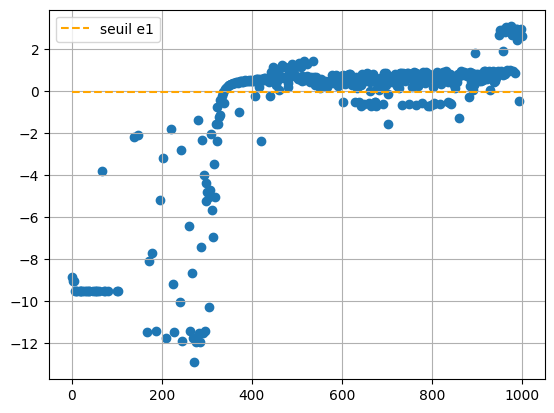

In [8]:
eps1 = -0.05

plt.scatter(indexes[:,0], np.log10(np.abs(D_son)))
plt.hlines(eps1, 0, 1000, colors='orange', linestyles='--', label = "seuil e1")
plt.legend()
#plt.ylim((-0.5, 0.6))
plt.grid()

C:\Users\Lalie\AppData\Local\Temp\ipykernel_26460\2599685046.py:7: RuntimeWarning: divide by zero encountered in log
  ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.log(np.abs(D_son)), c = np.log(np.abs(D_son)), cmap='viridis')


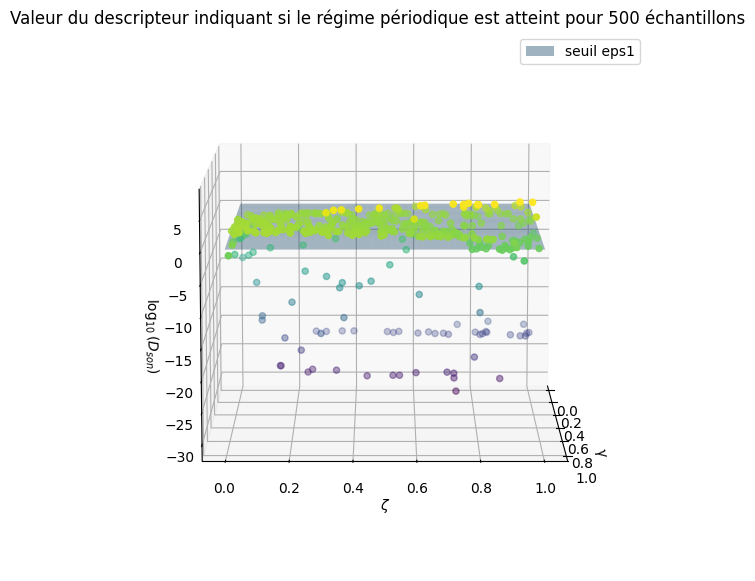

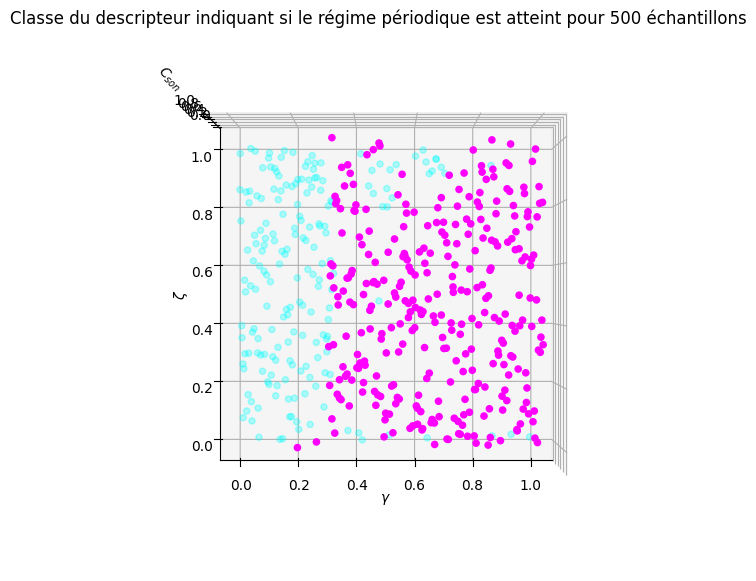

In [9]:
axis = np.linspace(0,1,500)
yi, xi = np.meshgrid(axis,axis)
zi = np.full_like(xi, eps1)

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.log(np.abs(D_son)), c = np.log(np.abs(D_son)), cmap='viridis')
ax.plot_surface(xi,yi,zi,alpha = 0.4, label = "seuil eps1")
ax.set_zlabel(r"$\log_{10}(D_{son})$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Valeur du descripteur indiquant si le régime périodique est atteint pour " + str(n_data) + " échantillons")
ax.legend()
#ax.colorbar(np.log(np.abs(D_son)), label=r"$\log_{10}(D_{son})$")
ax.view_init(elev=10., azim=0, roll=0)
plt.show()

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], C_son, c = C_son, cmap='cool')
ax.set_zlabel(r"$C_{son}$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Classe du descripteur indiquant si le régime périodique est atteint pour " + str(n_data) + " échantillons")
#ax.colorbar(np.log(np.abs(D_son)), label=r"$\log_{10}(D_{son})$")
ax.view_init(elev=90., azim=-90, roll=0)

Par lecture graphique, on obtient $\epsilon_1 \approx 10^{-2}$ USI.

In [6]:
class Classifier_son:
    
    def __init__(self, eps1 = 10**(-2)):
        self.eps1 = eps1
    
    def descripteur_son(self, P) :
        """
        Renvoie la valeur de la pression moyennée sur le dernier tiers des échantillons
        """ 
        N = len(P)
        N_tiers = N // 3
        P_tiers = P[2*N_tiers:]
        return np.mean(P_tiers)
    
    def classifieur_son(self, P) :
        """
        Renvoie 0 si les paramètres ne permettent pas de produire un son, 1 sinon.  
        """
        D_son = self.descripteur_son(P)
        c = 0
        if D_son > self.eps1 : 
            c = 1 
        return c

**Question : est-ce qu'on obtient le même $\epsilon_1$ pour le violon ? 

## 2. Régime d'oscillation

0.004185676574707031 0.08650422096252441 0.024156808853149414


C:\Users\Lalie\AppData\Local\Temp\ipykernel_3764\4292228966.py:21: RuntimeWarning: invalid value encountered in sqrt
  power_meth2 = np.sqrt(np.convolve(P_test, kernel, mode='same'))


Text(0, 0.5, 'pwr')

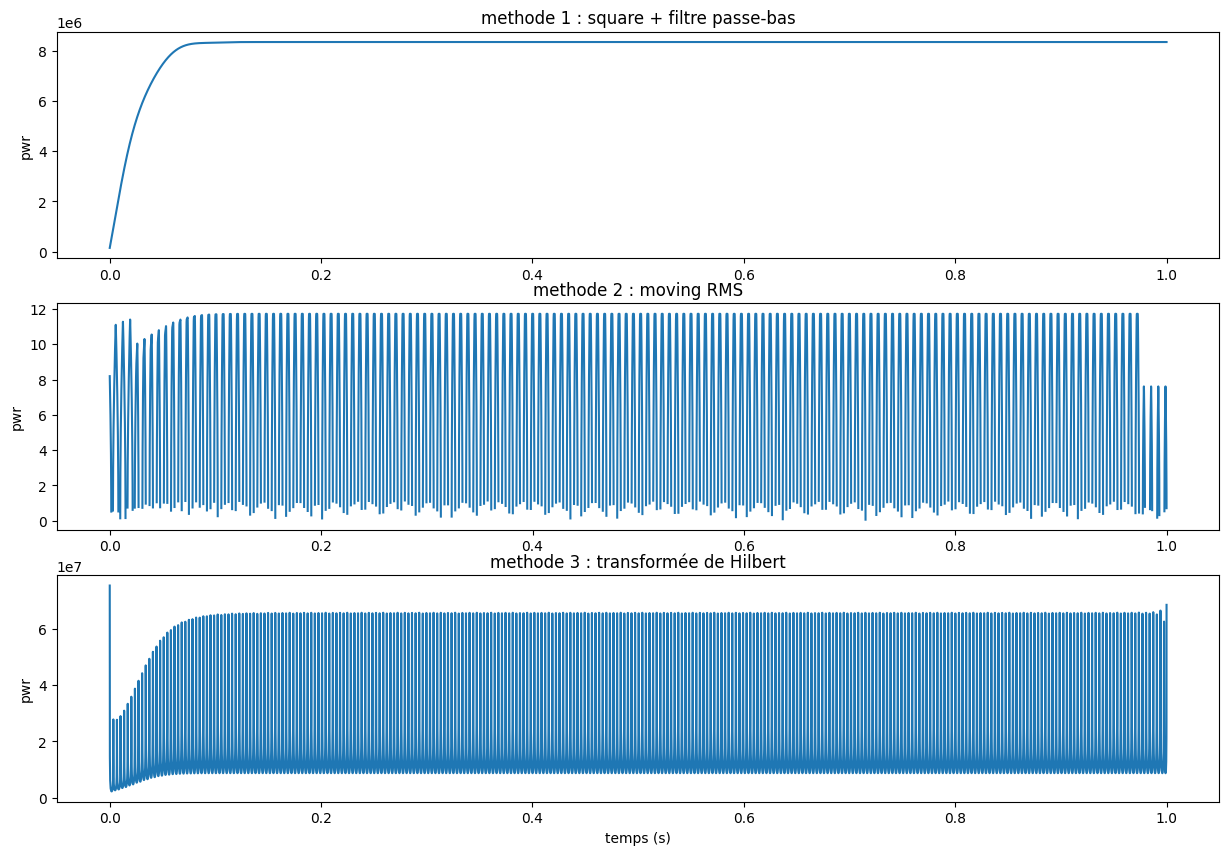

In [ ]:
# Calcul de l'enveloppe de puissance
gamma_test = 0.38           
zeta_test = 0.4 
P_test = simulation(T_sec, delta_t, gamma_test, zeta_test)

# methode 1 : square + filtre passe-bas 
from scipy.signal import butter, filtfilt
start = time()
power = P_test**2
cutoff = 20  # enveloppe = ce qui varie lentement
b, a = butter(4, cutoff / (1 / (2*delta_t)), btype='low')
power_meth1 = filtfilt(b, a, power)
end = time()
temps1 = end - start

# methode 2 : moving RMS
window_ms = 50  # RMS window length
window_samples = int(fs * window_ms / 1000)
kernel = np.ones(window_samples) / window_samples
start = time()
power_meth2 = np.sqrt(np.convolve(P_test, kernel, mode='same'))
end = time()
temps2 = end - start

# methode 3 : transformée de Hilbert
from scipy.signal import hilbert
start = time()
analytic_signal = hilbert(P_test)
amplitude_envelope = np.abs(analytic_signal)
power_meth3 = amplitude_envelope**2
end = time()
temps3 = end - start

# plot
print(temps1, temps2, temps3)

plt.figure(figsize=(15,10))
plt.subplot(311)
plt.plot(np.arange(len(power_meth1))*delta_t, power_meth1)
plt.title("methode 1 : square + filtre passe-bas")
plt.ylabel("pwr")
plt.subplot(312)
plt.plot(np.arange(len(power_meth2))*delta_t, power_meth2)
plt.title("methode 2 : moving RMS")
plt.ylabel("pwr")
plt.subplot(313)
plt.plot(np.arange(len(power_meth3))*delta_t, power_meth3)
plt.title("methode 3 : transformée de Hilbert")
plt.xlabel("temps (s)")
plt.ylabel("pwr")

In [88]:
from scipy.signal import butter, filtfilt

fs = 1/delta_t
cutoff = 20  # enveloppe = ce qui varie lentement
b, a = butter(4, cutoff / (fs / 2), btype='low')

def descripteur_regime(P, cutoff = 20, fs = 1/delta_t):
    power = P**2
    pwr = filtfilt(b, a, power)
    D_regime = np.var(pwr)/np.mean(pwr)
    return D_regime

# Détermination de $\epsilon_2$
dur = 0.5
D_regime = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]])
    D_regime[i] = descripteur_regime(P)

epoch : 1 / 100
epoch : 2 / 100
epoch : 3 / 100
epoch : 4 / 100
epoch : 5 / 100
epoch : 6 / 100
epoch : 7 / 100
epoch : 8 / 100
epoch : 9 / 100
epoch : 10 / 100
epoch : 11 / 100
epoch : 12 / 100
epoch : 13 / 100
epoch : 14 / 100
epoch : 15 / 100
epoch : 16 / 100
epoch : 17 / 100
epoch : 18 / 100
epoch : 19 / 100
epoch : 20 / 100
epoch : 21 / 100
epoch : 22 / 100
epoch : 23 / 100
epoch : 24 / 100
epoch : 25 / 100
epoch : 26 / 100
epoch : 27 / 100
epoch : 28 / 100
epoch : 29 / 100
epoch : 30 / 100
epoch : 31 / 100
epoch : 32 / 100
epoch : 33 / 100
epoch : 34 / 100
epoch : 35 / 100
epoch : 36 / 100
epoch : 37 / 100
epoch : 38 / 100
epoch : 39 / 100
epoch : 40 / 100
epoch : 41 / 100
epoch : 42 / 100
epoch : 43 / 100
epoch : 44 / 100
epoch : 45 / 100
epoch : 46 / 100
epoch : 47 / 100
epoch : 48 / 100
epoch : 49 / 100
epoch : 50 / 100
epoch : 51 / 100
epoch : 52 / 100
epoch : 53 / 100
epoch : 54 / 100
epoch : 55 / 100
epoch : 56 / 100
epoch : 57 / 100
epoch : 58 / 100
epoch : 59 / 100
epoch 

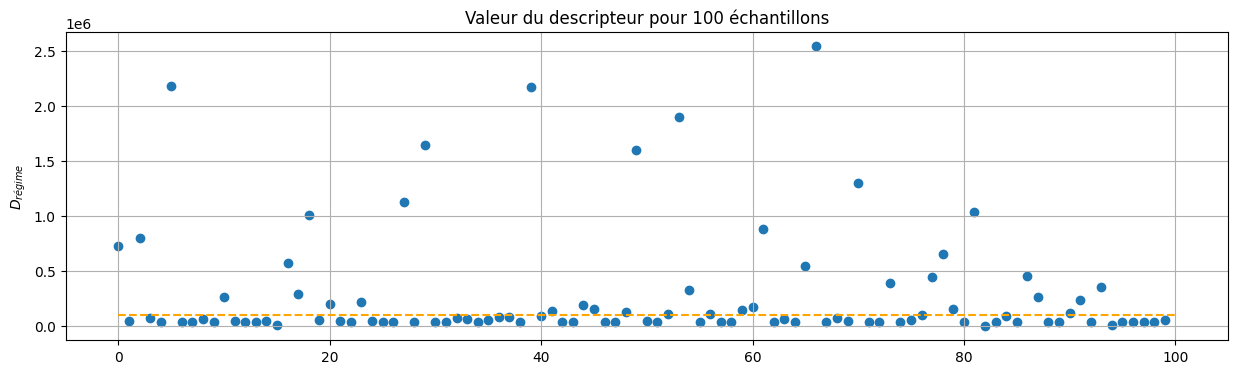

In [113]:
eps2 = 1e5

plt.figure(figsize = (15,4))
plt.title("Valeur du descripteur pour " + str(n_data) + " échantillons")
plt.scatter(np.arange(len(D_regime)), D_regime)
plt.hlines(eps2, 0, n_data, colors = "orange", linestyles = "--", label ="seuil de classification" )
plt.ylabel(r"$D_{régime}$")
plt.grid()

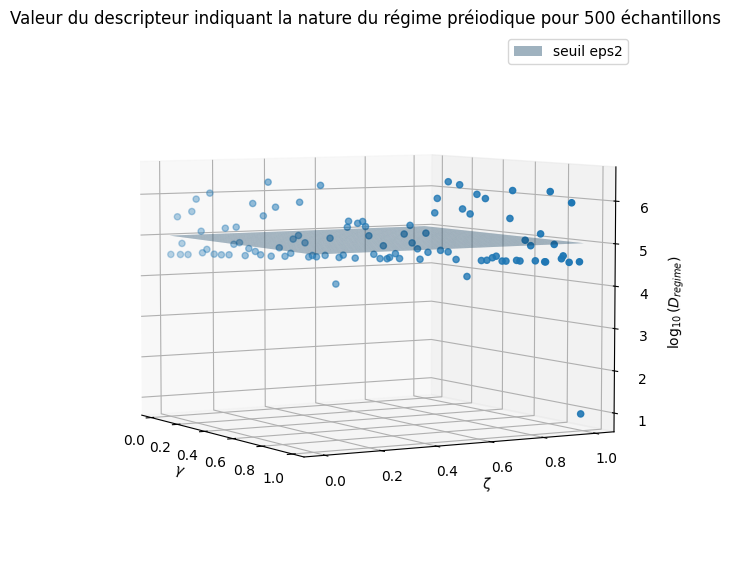

In [112]:
eps2 = 5
axis = np.linspace(0,1,500)
yi, xi = np.meshgrid(axis,axis)
zi = np.full_like(xi, eps2)

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,0]], np.log10(D_regime))
ax.plot_surface(xi,yi,zi,alpha = 0.4, label = "seuil eps2")
ax.set_zlabel(r"$\log_{10}(D_{regime})$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Valeur du descripteur indiquant la nature du régime préiodique pour 500 échantillons")
ax.legend()
ax.view_init(elev=5., azim=-30, roll=0)

In [114]:
class Classifier_regime():

    def __init__(self, eps2 = 1e5, cutoff_lowpass = 20, delta_t = delta_t):
        from scipy.signal import butter, filtfilt
        self.eps2 = eps2
        self.fs = 1/delta_t
        self.cutoff = cutoff_lowpass 
        self.b, self.a = butter(4, self.cutoff / (self.fs / 2), btype='low')

    def pwr(self, P) : 
        """
        Renvoie l'enveloppe de puissance de la pression dans l'embouchure
        """
        power = filtfilt(self.b, self.a, P**2)
        return power

    def descripteur_regime(self, P):
        pwr = self.pwr(P)
        D_regime = np.var(pwr)/np.mean(pwr)
        return D_regime
    
    def classifieur_regime(self, P) :
        """
        Renvoie 0 pour un régime quai-périodique, 1 pour un régime périodique.  
        """
        c = 0
        D_note  = self.descripteur_regime(P)
        if D_note < self.eps2 :
            c = 1
        return c 

## 3. Justesse de la note

**Estimation de la fréquence fondamentale par la méthode du produit spectral** (source : TP TSM, Geoffroy Peeters)

Si nous notons $f_k = \frac{k}{N_{fft}}$ les fréquences discrètes de la DFT, le produit spectral est donné par:
\begin{equation}
    P(f_k) = \prod_{h=1}^{H} |X(h \cdot f_k)|
\end{equation}
Par défaut nous utiliserons $H$ = 4.

Détail des étapes de calcul :

Dans un premier temps, nous calculons la transformée de Fourier discrète (TFD) du signal $x(n)$ sur $N_{fft}$ points.
Nous commençons par multiplier $x(n)$ par une fenêtre de hamming de taille $L_n$ (ceci afin de diminuer la hauteur des lobes secondaires).

La longueur $L_n$ ainsi que le type de cette fenêtre détermine la **résolution fréquentielle**, i.e. le pouvoir de séparer en fréquence deux sinusoides adjacentes.

Le nombre de points de la la DFT, $N_{fft}$, détermine lui la **précision fréquentielle**., i.e. la distance en Hz entre $f_k$ et $f_{k+1}$.
Il faut impérativement utiliser une valeur de $N_{fft}$ supérieure à $L_n$. En pratique $N_{fft}$ est choisi comme une puissance de 2 de manière à pouvoir utiliser l'algorithme de FFT (Fast Fourier Transform). Ceci peut se calculer à l'aide de la fonction ```nextpow2```.

Calculer ensuite la transformée de Fourier Discrète $X(k)$.

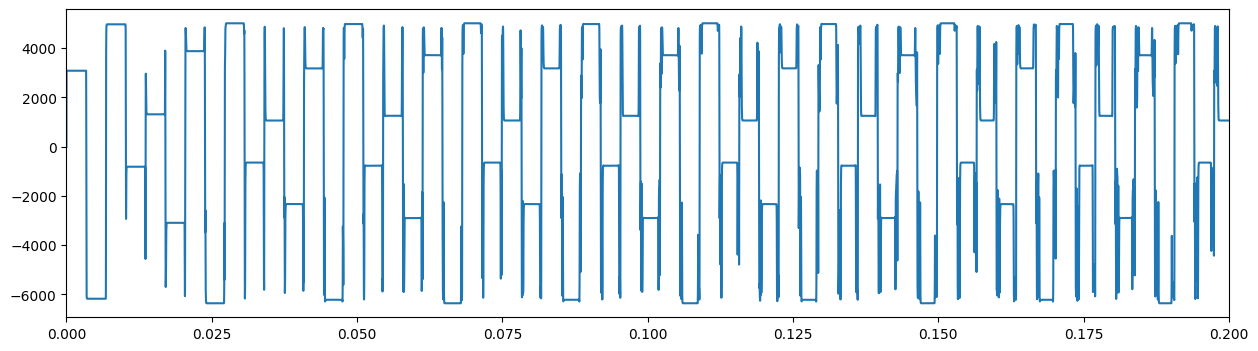

49.7955322265625


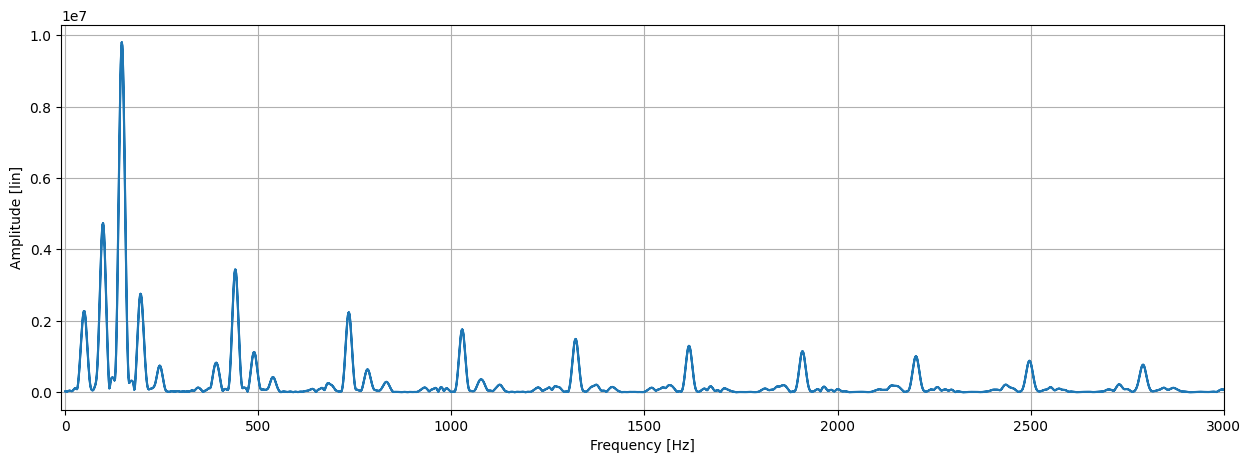

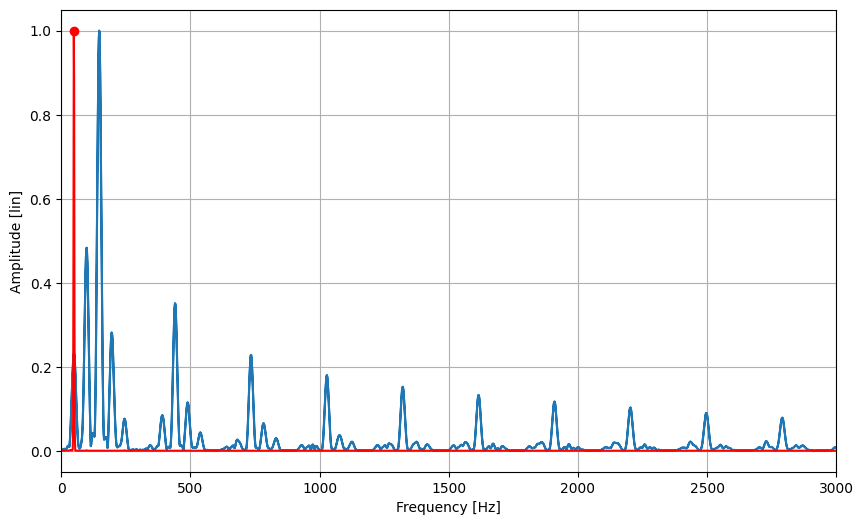

In [22]:
# Test du code sur des signaux de pression
gamma_test = 0.48           
zeta_test = 0.9
P_test = simulation(T_sec, delta_t, gamma_test, zeta_test, L, P_M, Zc)

fs = 44100*2
plt.figure(figsize = (15, 4))
plt.plot(np.arange(len(P_test))/fs, P_test)
plt.xlim((0,0.2))
plt.show()

def F_plot1(x_v, y_v, labelX, labelY):
    plt.plot(x_v, y_v)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.grid(True)
    return

def F_plot2(data_m, col_v=np.zeros(0), row_v=np.zeros(0), labelCol='', labelRow=''):
    plt.imshow(data_m, origin='lower', aspect='auto', extent=[row_v[0], row_v[-1], col_v[0], col_v[-1]], interpolation='nearest')
    plt.colorbar()
    plt.set_cmap('gray_r')
    plt.xlabel(labelRow)
    plt.ylabel(labelCol)
    plt.grid(True)
    return

do_student = True

def F_getSpectreFromAudio(x, L_n, Nfft, sr_hz, display = False):
    """
    inputs:
        - x: signal
        - L_n: window duration in samples
        - Nfft: fft size
        - sr_hz: sampling rate
    outputs:
        - fftFreq_hz_v (N/2+1,): vector containing the DFT frequencies in Hz
        - fftAmpl_v (N/2+1,): vector containing the DFT amplitudes
    """

    if do_student:
        sig = x[:L_n]*np.hamming(L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(Nfft, d=1/sr_hz))
        fftAmpl_v = np.abs(np.fft.fft(sig, Nfft))

    # +++++++++++++++++++++++++++++++
    if display :
        plt.figure(figsize=(15, 5))
        F_plot1(fftFreq_hz_v, fftAmpl_v, 'Frequency [Hz]', 'Amplitude [lin]')
        plt.xlim((-10,3000))
    # +++++++++++++++++++++++++++++++

    return fftFreq_hz_v, fftAmpl_v

#params fft
def nextpow2(i):
    n = 1
    while n < i:
        n *= 2
    return n
L_sec = 0.1
L_n = int(L_sec*fs)
Nfft = 4*nextpow2(L_n)

fftFreq_hz_v, fftAmpl_v = F_getSpectreFromAudio(P_test, L_n, Nfft, fs, display=True)

def F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, H, fmin_hz, fmax_hz, Nfft, sr_hz, display = False):
    """
    inputs:
        - fftFreq_hz_v (N/2+1,): vector containing the FFT frequencies in Hz
        - fftAmpl_v (N/2+1,): vector containing the FFT amplitude
        - H: number of times the spectrum is decimated
        - fmin_hz: minimum frequency in Hz to look for F0
        - fmax_hz: maximum frequency in Hz to look for F0
        - Nfft: fft size
        - sr_hz: sampling rate
    outputs:
        - spFreq_hz_v: vector containing the SpectralProduct frequencies in Hz
        - spAmpl_v: vector containing the SpectralProduct amplitudes
        - f0_hz: estimated F0 in Hz
    """

    if do_student:
        R = int(Nfft/(2*H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(fmin_hz*Nfft/sr_hz)
        Nmax = min(R,int(fmax_hz*Nfft/sr_hz))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        
    # +++++++++++++++++++++++++++++++
    if display : 
        plt.figure(figsize=(10,6))
        F_plot1(fftFreq_hz_v, fftAmpl_v/np.max(fftAmpl_v), 'Frequency [Hz]', 'Amplitude [lin]')
        plt.plot(spFreq_hz_v, spAmpl_v/np.max(spAmpl_v), 'r')
        plt.xlim((0,3000))
        plt.plot(f0_hz, 1, 'ro')
    # +++++++++++++++++++++++++++++++

    return spFreq_hz_v, spAmpl_v, f0_hz

spFreq_hz_v, spAmpl_v, f0_hz = F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, 4, 50, 6000, Nfft, fs, display=True)
print(f0_hz)


In [34]:
class Classifier_justesse():

    def __init__(self, eps3 = 5, fs=fs, L_sec = 0.1, H = 4, fmin = 50, fmax = 2e4):
        self.eps3 = eps3 # l'écart maximal en cents à la note de référence. Par défaut : 5 cents
        # params fft
        self.fs = fs
        self.L_sec = L_sec
        self.L_n = int(L_sec*self.fs)
        self.Nfft = 4*self.nextpow2(self.L_n)
        # params produit spectral
        self.H = H
        self.fmin = fmin
        self.fmax = fmax

    def set_f_ref(self, L, c = 343, a = R) : 
        self.f_ref = c/(4*(L+0.6133*a))
        return self.f_ref

    def nextpow2(self, i):
        n = 1
        while n < i:
            n *= 2
        return n
    
    def get_spectre(self, x):
        sig = x[:self.L_n]*np.hamming(self.L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(self.Nfft, d=1/self.fs))
        fftAmpl_v = np.abs(np.fft.fft(sig, self.Nfft))
        return fftFreq_hz_v, fftAmpl_v

    def get_pitch(self, P):
        fftFreq_hz_v, fftAmpl_v = self.get_spectre(P)
        R = int(self.Nfft/(2*self.H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(self.H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(self.fmin*self.Nfft/self.fs)
        Nmax = min(R,int(self.fmax*self.Nfft/self.fs))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        return f0_hz

    def descripteur_justesse(self, P):
        f_act = self.get_pitch(P)
        D_note = 1200*np.log2(f_act/self.f_ref)
        return D_note
    
    def classifieur_justesse(self,P):
        """
        Renvoie 0 si la note n'est pas juste, 1 sinon.  
        """
        c = 0
        D_note  = self.descripteur_justesse(P)
        if np.abs(D_note) < self.eps3 :
            c = 1
        return c

In [13]:
# test Classifier_justesse
class_justesse = Classifier_justesse()
class_justesse.set_f_ref(L=0.58)
T_sec = 1
D_justesse = np.zeros(len(indexes))
C_justesse = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]], L, P_M, Zc)
    D_justesse[i] = class_justesse.descripteur_justesse(P)
    C_justesse[i] = class_justesse.classifieur_justesse(P)

epoch : 1 / 100
epoch : 2 / 100
epoch : 3 / 100
epoch : 4 / 100
epoch : 5 / 100
epoch : 6 / 100
epoch : 7 / 100
epoch : 8 / 100
epoch : 9 / 100
epoch : 10 / 100
epoch : 11 / 100
epoch : 12 / 100
epoch : 13 / 100
epoch : 14 / 100
epoch : 15 / 100
epoch : 16 / 100
epoch : 17 / 100
epoch : 18 / 100
epoch : 19 / 100
epoch : 20 / 100
epoch : 21 / 100
epoch : 22 / 100
epoch : 23 / 100
epoch : 24 / 100
epoch : 25 / 100
epoch : 26 / 100
epoch : 27 / 100
epoch : 28 / 100
epoch : 29 / 100
epoch : 30 / 100
epoch : 31 / 100
epoch : 32 / 100
epoch : 33 / 100
epoch : 34 / 100
epoch : 35 / 100
epoch : 36 / 100
epoch : 37 / 100
epoch : 38 / 100
epoch : 39 / 100
epoch : 40 / 100
epoch : 41 / 100
epoch : 42 / 100
epoch : 43 / 100
epoch : 44 / 100
epoch : 45 / 100
epoch : 46 / 100
epoch : 47 / 100
epoch : 48 / 100
epoch : 49 / 100
epoch : 50 / 100
epoch : 51 / 100
epoch : 52 / 100
epoch : 53 / 100
epoch : 54 / 100
epoch : 55 / 100
epoch : 56 / 100
epoch : 57 / 100
epoch : 58 / 100
epoch : 59 / 100
epoch 

In [40]:
print(1200*np.log2(3))

1901.9550008653873


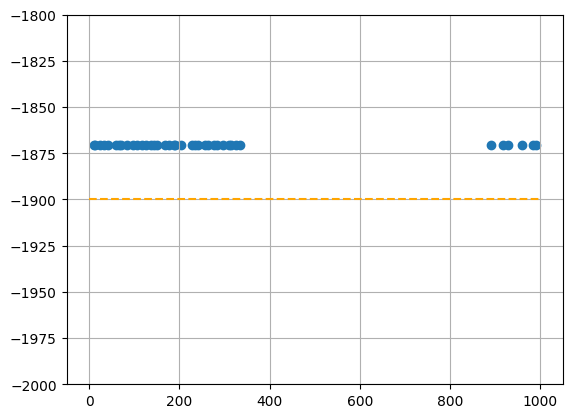

In [21]:
eps3 = 5

plt.scatter(indexes[:,0], D_justesse)
plt.hlines([-5, 5, -1200, -1900], 0, 1000, colors = "orange", linestyles='--')
plt.ylim((-2000,-1800))
plt.grid()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


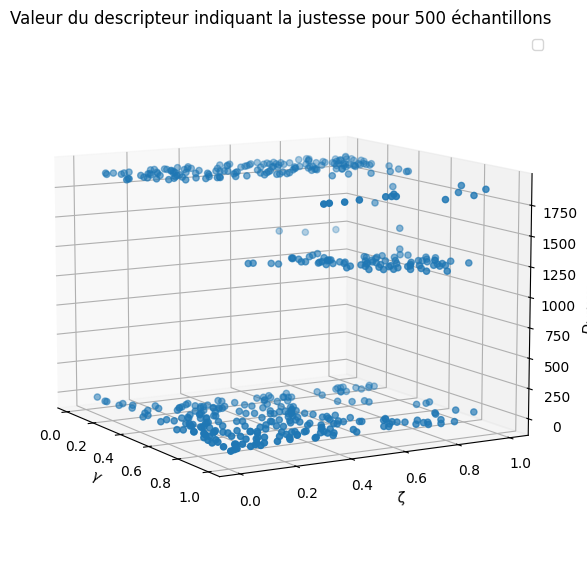

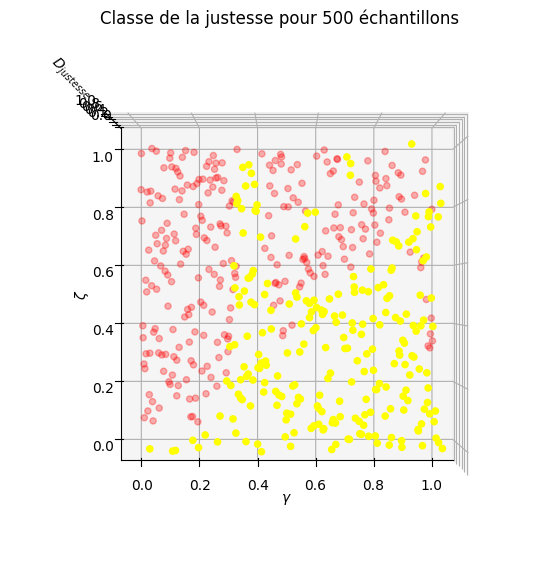

In [15]:
eps3 = 5 # cents
axis = np.linspace(0,1,500)
yi, xi = np.meshgrid(axis,axis)
zi = np.full_like(xi, eps3)

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.abs(D_justesse))
#ax.plot_surface(xi,yi,zi,alpha = 0.4, label = "seuil eps3")
ax.set_zlabel(r"$D_{justesse}$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Valeur du descripteur indiquant la justesse pour " + str(n_data) + " échantillons")
ax.legend()
ax.view_init(elev=10., azim=-30, roll=0)
plt.show()

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], C_justesse, c = C_justesse, cmap="autumn")
ax.set_zlabel(r"$D_{justesse}$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Classe de la justesse pour " + str(n_data) + " échantillons")
ax.view_init(elev=90., azim=-90, roll=0)

## 4. Longueur du transitoire d'attaque

Méthode temporelle (V. Salvador Castrillo) :
- fréquence d'oscillation qui correspond à la fréquence que l'on souhaite exciter à $\pm$ 0.5 1/2 ton (100 cents) : $f_{osc} \in [f_{ref} - 2^{1/12}*f_{ref}, f_{ref} + 2^{1/12}*f_{ref}]$
- périodicité stable ce qui correspond à une certaine limite de l'écart type : $\sigma_w \leq 0.6$

Fonctionne avec les violons : le régime de Helmholtz correspond à un glissement par période. https://github.com/VictorSalvador/transient_detector.git

Pour déterminer $f_{osc}$, dans sa thèse : 
$$
\begin{equation}
f_{osc}(n) = \frac{N_{pics}}{L_w}
\end{equation}
$$

$N_{pics}$ est le nombre de pics du signal $|x'| = |x(n+1) - x(n)|$ dans une fenêtre rectangulaire de longueur $L_w$.

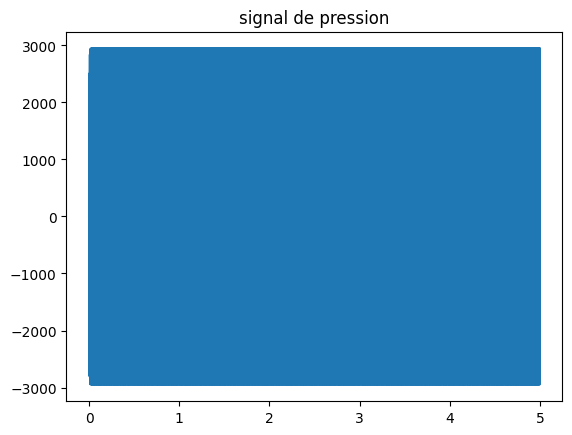

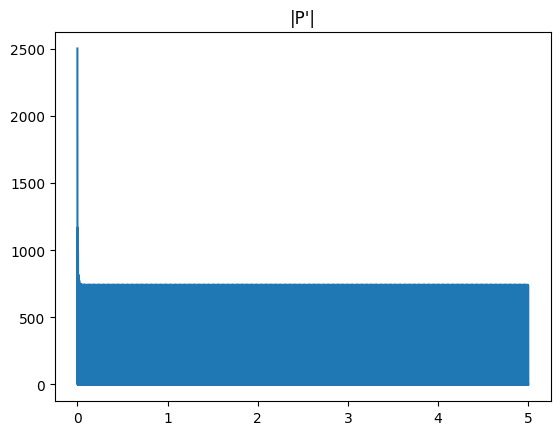

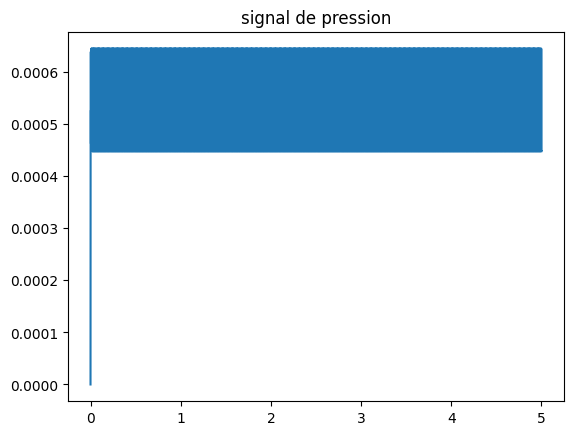

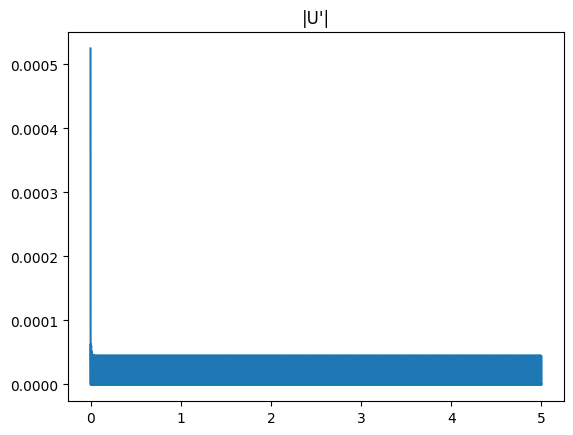

In [41]:
# calcul de |x'|
gamma_test = 0.4          
zeta_test = 0.8
T_sec = 5
_,U_test,P_test,P_ext,_ = execution(T_sec, delta_t, gamma_test, zeta_test, zeta_test*P_M/U_A)
abs_sig_diff = np.abs(np.diff(P_test))
abs_sig_diff_u = np.abs(np.diff(U_test))

# # Minimum height of the peaks: Adaptative threshold varying with
# # abs_sig_diff envelope
# # --> Minimum height = pp_height = maximum peak of the windowed
# #                      abs_sig_diff signal times pp_height_factor

# pp_height = np.zeros_like(abs_sig_diff)

# for i in range(len(abs_sig_diff)-win_len):
#     pp_height[int(win_len/2)+i] = np.max(abs_sig_diff[i:win_len+i]) \
#         * pp_height_factor

# # Adjust initial and final height of signal (if not, height=0)
# pp_height[0:int(win_len/2)] = pp_height[int(win_len/2)]
# pp_height[-int(win_len/2):] = pp_height[-int(win_len/2)-1]

# # Detect peaks
# peaks, _ = scipy.signal.find_peaks(abs_sig_diff, height=pp_height,
#                                     prominence=pp_prominences[string],
#                                     distance=pp_distances[string])

plt.plot(np.arange(len(P_test))*delta_t, P_test) 
plt.title("signal de pression")
#plt.xlim((0,0.5))
plt.show()

plt.plot(np.arange(len(abs_sig_diff))*delta_t, abs_sig_diff)
plt.title("|P'|")
#plt.xlim((0,0.5))
# plt.ylim((0, 100))
plt.show()

plt.plot(np.arange(len(U_test))*delta_t, U_test) 
plt.title("signal de pression")
#plt.xlim((0,0.5))
plt.show()

plt.plot(np.arange(len(abs_sig_diff_u))*delta_t, abs_sig_diff_u)
plt.title("|U'|")
#plt.xlim((0,0.5))
# plt.ylim((0, 100))
plt.show()

In [42]:
from IPython.display import display, Audio
display(Audio(P_ext, rate = 44100*2))

## 5. Bifurcation directe ou inverse

# 6. Régime bipériodique, tripériodique

In [22]:
class Classifier_biperiode():

    def __init__(self, fs=44100*2, fmin = 50, fmax = 2e4, L_sec = 0.1, H = 4):
        # params fft
        self.fs = fs
        self.L_sec = L_sec
        self.L_n = int(L_sec*self.fs)
        self.Nfft = 4*self.nextpow2(self.L_n)
        # params produit spectral
        self.H = H
        self.fmin = fmin
        self.fmax = fmax

    def set_f_ref(self, L, a, c = 343) : 
            self.f_ref = c/(4*(L+0.6133*a))
            return self.f_ref


    def nextpow2(self, i):
        n = 1
        while n < i:
            n *= 2
        return n
    
    def get_spectre(self, x):
        sig = x[:self.L_n]*np.hamming(self.L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(self.Nfft, d=1/self.fs))
        fftAmpl_v = np.abs(np.fft.fft(sig, self.Nfft))
        return fftFreq_hz_v, fftAmpl_v

    def get_pitch(self, P):
        fftFreq_hz_v, fftAmpl_v = self.get_spectre(P)
        R = int(self.Nfft/(2*self.H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(self.H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(self.fmin*self.Nfft/self.fs)
        Nmax = min(R,int(self.fmax*self.Nfft/self.fs))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        return f0_hz

    def descripteur(self, P):
        f_act = self.get_pitch(P)
        D_note = 1200*np.log2(f_act/self.f_ref)
        return D_note
    
    def classify(self,P):
        """
        Renvoie -1 si la note n'est pas juste, 1 sinon.  
        """
        c = -1
        D_note  = self.descripteur(P)
        if 1150 < np.abs(D_note) < 1250 :
            c = 1
        return c

In [23]:
class Classifier_triperiode():

    def __init__(self, fs=44100*2, fmin = 50, fmax = 2e4, L_sec = 0.1, H = 4):
        # params fft
        self.fs = fs
        self.L_sec = L_sec
        self.L_n = int(L_sec*self.fs)
        self.Nfft = 4*self.nextpow2(self.L_n)
        # params produit spectral
        self.H = H
        self.fmin = fmin
        self.fmax = fmax

    def set_f_ref(self, L, a, c = 343) : 
            self.f_ref = c/(4*(L+0.6133*a))
            return self.f_ref


    def nextpow2(self, i):
        n = 1
        while n < i:
            n *= 2
        return n
    
    def get_spectre(self, x):
        sig = x[:self.L_n]*np.hamming(self.L_n)
        fftFreq_hz_v = np.abs(np.fft.fftfreq(self.Nfft, d=1/self.fs))
        fftAmpl_v = np.abs(np.fft.fft(sig, self.Nfft))
        return fftFreq_hz_v, fftAmpl_v

    def get_pitch(self, P):
        fftFreq_hz_v, fftAmpl_v = self.get_spectre(P)
        R = int(self.Nfft/(2*self.H) + 1)
        spAmpl_v = np.ones(R)
        spFreq_hz_v = fftFreq_hz_v[:R]
        for h in range(self.H) :
          X = fftAmpl_v[::h+1] 
          spAmpl_v = spAmpl_v*X[:R]
        Nmin = int(self.fmin*self.Nfft/self.fs)
        Nmax = min(R,int(self.fmax*self.Nfft/self.fs))
        i_max = np.argmax(spAmpl_v[Nmin:Nmax]) + Nmin
        f0_hz = spFreq_hz_v[i_max]
        return f0_hz

    def descripteur(self, P):
        f_act = self.get_pitch(P)
        D_note = 1200*np.log2(f_act/self.f_ref)
        return D_note
    
    def classify(self,P):
        """
        Renvoie -1 si la note n'est pas juste, 1 sinon.  
        """
        c = -1
        D_note  = self.descripteur(P)
        if 1850 < np.abs(D_note) < 1950 :
            c = 1
        return c

In [33]:
# test 
class_double = Classifier_biperiode()
class_double.set_f_ref(L=0.58, a = R, c = c)
class_triple = Classifier_triperiode()
class_triple.set_f_ref(L=0.58, a = R, c = c)
T_sec = 1
D_double = np.zeros(len(indexes))
C_double = np.zeros(len(indexes))
D_triple = np.zeros(len(indexes))
C_triple = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]], L, P_M, Zc)
    D_double[i] = class_double.descripteur(P)
    C_double[i] = class_double.classify(P)
    D_triple[i] = class_triple.descripteur(P)
    C_triple[i] = class_triple.classify(P)

epoch : 1 / 500
epoch : 2 / 500
epoch : 3 / 500
epoch : 4 / 500
epoch : 5 / 500
epoch : 6 / 500
epoch : 7 / 500
epoch : 8 / 500
epoch : 9 / 500
epoch : 10 / 500
epoch : 11 / 500
epoch : 12 / 500
epoch : 13 / 500
epoch : 14 / 500
epoch : 15 / 500
epoch : 16 / 500
epoch : 17 / 500
epoch : 18 / 500
epoch : 19 / 500
epoch : 20 / 500
epoch : 21 / 500
epoch : 22 / 500
epoch : 23 / 500
epoch : 24 / 500
epoch : 25 / 500
epoch : 26 / 500
epoch : 27 / 500
epoch : 28 / 500
epoch : 29 / 500
epoch : 30 / 500
epoch : 31 / 500
epoch : 32 / 500
epoch : 33 / 500
epoch : 34 / 500
epoch : 35 / 500
epoch : 36 / 500
epoch : 37 / 500
epoch : 38 / 500
epoch : 39 / 500
epoch : 40 / 500
epoch : 41 / 500
epoch : 42 / 500
epoch : 43 / 500
epoch : 44 / 500
epoch : 45 / 500
epoch : 46 / 500
epoch : 47 / 500
epoch : 48 / 500
epoch : 49 / 500
epoch : 50 / 500
epoch : 51 / 500
epoch : 52 / 500
epoch : 53 / 500
epoch : 54 / 500
epoch : 55 / 500
epoch : 56 / 500
epoch : 57 / 500
epoch : 58 / 500
epoch : 59 / 500
epoch 

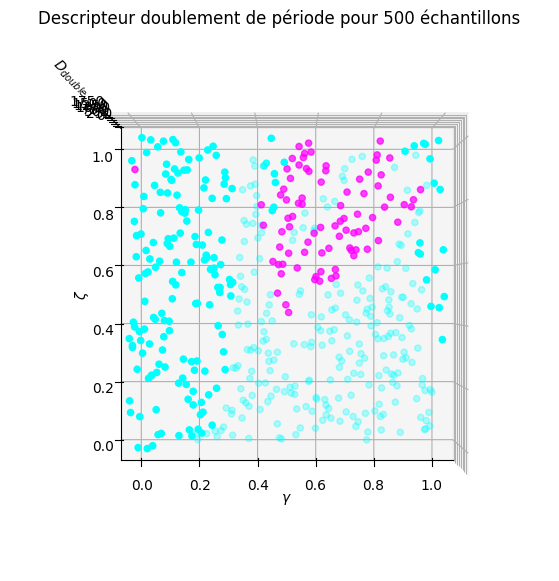

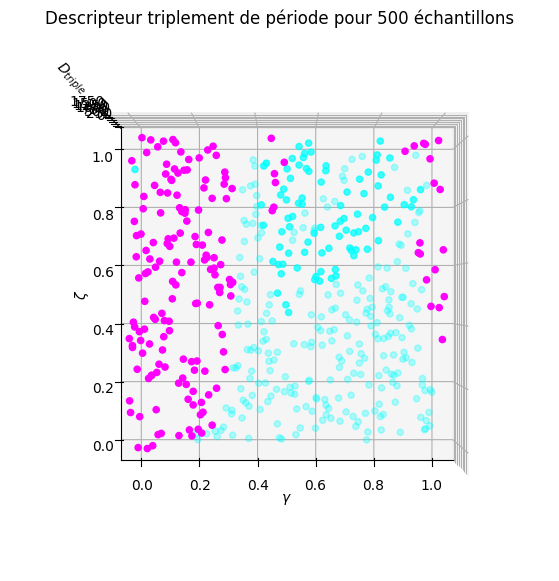

In [36]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.abs(D_double), c = C_double, cmap = "cool")
ax.set_zlabel(r"$D_{double}$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Descripteur doublement de période pour " + str(n_data) + " échantillons")
ax.view_init(elev=90., azim=-90, roll=0)
plt.show()

fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.abs(D_triple), c = C_triple, cmap = "cool")
ax.set_zlabel(r"$D_{triple}$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Descripteur triplement de période pour " + str(n_data) + " échantillons")
ax.view_init(elev=90., azim=-90, roll=0)
plt.show()

## Bonus : Relation Fréquence - Longueur

In [72]:
# Clarinette de Coline avec longueur variable : 

# PARAMETRES PHYSIQUES ET VARIABLES

T_sec = 1         # durée simulée (s)

# Paramètres physiques

T_deg = 20             # température (°C)
T_K = 273.15 + T_deg   # température (K)
c = 20.05*np.sqrt(T_K) # vitesse du son (m/s)
rho = 1.292*273.15/T_K # masse volumique de l'air (kg/m^3)
lv = 4e-8
lt = 5.6e-8
cp_over_cv = 1.402

# Paramètres d'anche et de résonateur

gamma = 0.38           # pression dans la bouche adimensionnée --> entre 1/3 et 1/2
zeta = 0.4            # paramètre d'ouverture d'anche adimensionné --> entre 0.2 et 0.6

H = 10**(-3)           # ouverture d'anche au repos (m)
w = 1.3*10**(-2)       # largeur du canal d'anche (m)
P_M = 10*10**3         # pression de plaquage (Pa)
Ks = P_M / H           # raideur anche (Pa/m)
P_m  = gamma * P_M      # pression dans la bouche (Pa)
U_A = w*H*np.sqrt(2/rho*P_M)
Zc = zeta*P_M/U_A      # impédance caractéristique (kg/s)
S = rho*c/Zc           # section du résonateur (m^2)
R = np.sqrt(S/np.pi)   # rayon du résonateur (m)
L = 0.58               # longueur du résonateur (m)
alpha = 2/(R*c**(3/2)) * ( np.sqrt(lv) + (cp_over_cv-1)*np.sqrt(lt))

# Paramètres utiles pour la simulation

T = 2*L/c               # temps de parcours d'un aller-retour (s)
#delta_t = T/128         # pas de temps (s)
#fs = int(np.rint(1/delta_t)) # fréquence d'échantillonage
fs = 44100*2
delta_t = 1/fs

# FONCTIONS

# Caractéristique non-linéaire
@njit
def F(P, gamma=gamma, zeta=zeta, P_M=P_M, Zc=Zc):
    """
    Caractéristique non-linéaire F telle que u = F(P_m-p)

    Parameters
    ----------
        P : float, pression dans le bec (Pa)
        gamma : float, pression dans la bouche adimensionnée
        zeta : float, paramètre d'ouverture d'anche adimensionné
        P_M : float, pression de plaquage
        Zc : float, impédance caractéristique
    Returns
    -------
        U : float, débit volumique dans le bec
    """
    p = P/P_M # pression adimensionnée
    if np.abs(gamma-p) <= 1:
        u = zeta * (1+p-gamma) * np.sqrt(np.abs(gamma-p)) * (gamma-p)/np.abs(gamma-p) # débit adimensionné
    else :
        u = 0
    U = u*P_M/Zc # débit dimensionné
    return U

@njit
def func_dicho(P, params):
    """
    Fonction dont on veut trouver le zéro par dichotomie
    
    Parameters
    ----------
        P : float, valeur de la pression dans le bec à laquelle on évalue la fonction
        params : array
    """
    qh, Zc = params[0], params[1]
    return F(P) - 1/Zc*(P-qh)

@njit
def dichotomie(func, params, a, b, n, tol=1e-9):
    """ 
    Trouver l'abcisse m tel que func(m) = 0 par dichotomie
    
    Parameters
    ----------
        func : fonction, fonction dont on cherche l'annulation
        params : array, paramètres d'entrée de la fonction
        a : float, borne minimale de l'intervalle de recherche
        b : float, borne maximale de l'intervalle de recherche
        tol : float, tolérance de précision sur la valeur de l'abcisse obtenue
        
    Returns
    -------
        m : float, abcisse pour laquelle la fonction s'annule
    """
    
    if func(a,params)*func(b,params) > 0:
        print("Mauvais choix des bornes de l'intervalle, n=",n)
    else :
        m = (a+b)/2
        
        while np.abs(a-b) > tol:
            if func(m,params) == 0.:
                return m
            elif func(a,params)*func(m,params) > 0:
                a = m
            else :
                b = m
            m = (a+b)/2
            
        return m
    

# BOUCLE TEMPORELLE

@njit
def execution_L(T_sec, delta_t,  gamma, zeta, L, Zc):

    D = int(np.rint(2*L/c * fs))
    beta = 2*R/(c/fs)
    n1 = 0.167
    d1 = 1.393
    d2 = 0.457

    temps = np.arange(0, T_sec, delta_t)
    N = len(temps)
    
    # Initialisation
    U, P, P_ext, qh = np.zeros(N), np.zeros(N), np.zeros(N), np.zeros(N)
    
    # Boucle
    for n in range(1,N):
    
        # calcul de qh à l'instant
        if n >= 2 :
            qh_prev2 = qh[n-2]
        else : 
            qh_prev2 = 0
        
        if n >= D :
            q0_D = P[n-D] + Zc*U[n-D]
        else :
            q0_D = 0
            
        if n >= D+1 :
            q0_D1 = P[n-D-1] + Zc*U[n-D-1]
        else :
            q0_D1 = 0
        
        if n >= D+2:
            q0_D2 = P[n-D-2] + Zc*U[n-D-2]
        else :
            q0_D2 = 0
            
        qh[n] = -2*(1-d2*beta**2)*qh[n-1] - (1 - d1*beta + d2*beta**2)*qh_prev2 \
            - (1+n1*beta)*q0_D - 2*q0_D1 - (1-n1*beta)*q0_D2
        qh[n] /= (1 + d1*beta + d2*beta**2)
        
        # calcul de q et f à l'instant t
        # trouver l'intersection entre la courbe F(P) et la droite U = 1/Zc*(P-qh) par dichotomie
        P[n] = dichotomie(func_dicho, [qh[n],Zc], -P_M, P_M, n)
        U[n] = F(P[n])
        P_ext[n] = (P[n]+U[n] - (P[n-1]+U[n-1])) / delta_t
        
    return temps, U, P, P_ext, qh

def simulation_L(T_sec, delta_t, gamma, zeta, L, ret_time=False): #Remise en forme pour pouvoir cartographier ensuite
    Zc = zeta*P_M/U_A
    start = time()
    _, _, P, _, _ = execution_L(T_sec, delta_t, gamma, zeta, L, Zc)
    stop = time()
    if ret_time:
        return P, stop-start
    else:
        return P

In [134]:
gamma_test = 0.6
zeta_test = 0.6
fs = 44100*2
delta_t = 1/fs
Ls = np.linspace(0,1,500)
class_justesse = Classifier_justesse()
Frequences = []
Frequences_th = []
D_freq = []

for i, l in enumerate(Ls) :
    print("epoch ", i + 1, " / 500")
    Frequences_th.append(class_justesse.set_f_ref(L=l))
    P = simulation_L(T_sec, delta_t, gamma_test, zeta_test, l, ret_time=False)
    Frequences.append(class_justesse.get_pitch(P))
    D_freq.append(class_justesse.descripteur_justesse(P))

epoch  1  / 500
epoch  2  / 500
epoch  3  / 500
epoch  4  / 500
epoch  5  / 500
epoch  6  / 500
epoch  7  / 500
epoch  8  / 500
epoch  9  / 500
epoch  10  / 500
epoch  11  / 500
epoch  12  / 500
epoch  13  / 500
epoch  14  / 500
epoch  15  / 500
epoch  16  / 500
epoch  17  / 500
epoch  18  / 500
epoch  19  / 500
epoch  20  / 500
epoch  21  / 500
epoch  22  / 500
epoch  23  / 500
epoch  24  / 500
epoch  25  / 500
epoch  26  / 500
epoch  27  / 500
epoch  28  / 500
epoch  29  / 500
epoch  30  / 500
epoch  31  / 500
epoch  32  / 500
epoch  33  / 500
epoch  34  / 500
epoch  35  / 500
epoch  36  / 500
epoch  37  / 500
epoch  38  / 500
epoch  39  / 500
epoch  40  / 500
epoch  41  / 500
epoch  42  / 500
epoch  43  / 500
epoch  44  / 500
epoch  45  / 500
epoch  46  / 500
epoch  47  / 500
epoch  48  / 500
epoch  49  / 500
epoch  50  / 500
epoch  51  / 500
epoch  52  / 500
epoch  53  / 500
epoch  54  / 500
epoch  55  / 500
epoch  56  / 500
epoch  57  / 500
epoch  58  / 500
epoch  59  / 500
epoch 

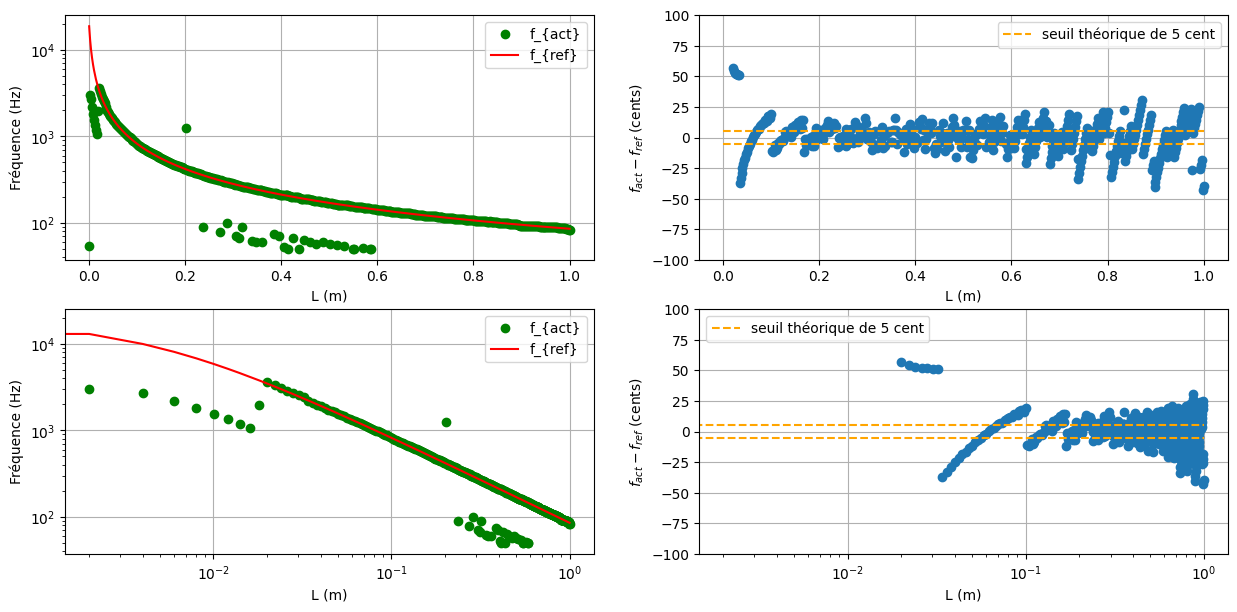

In [136]:
plt.figure(figsize = (15,7))
plt.subplot(221)
plt.semilogy(Ls, Frequences, 'go', label = r'f_{act}')
plt.semilogy(Ls, Frequences_th, 'r', label = r'f_{ref}')
plt.xlabel("L (m)")
plt.ylabel("Fréquence (Hz)")
plt.legend()
plt.grid()

plt.subplot(222)
plt.plot(Ls, D_freq, "o")
plt.ylim((-100,100))
plt.hlines([-5, 5], 0, 1, colors='orange', linestyles = '--', label='seuil théorique de 5 cent')
plt.xlabel("L (m)")
plt.ylabel(r'$f_{act} - f_{ref}$ (cents)')
plt.legend()
plt.grid()

plt.subplot(223)
plt.loglog(Ls, Frequences, 'go', label = r'f_{act}')
plt.loglog(Ls, Frequences_th, 'r', label = r'f_{ref}')
plt.xlabel("L (m)")
plt.ylabel("Fréquence (Hz)")
plt.legend()
plt.grid()

plt.subplot(224)
plt.semilogx(Ls, D_freq, "o")
plt.ylim((-100,100))
plt.hlines([-5, 5], 0, 1, colors='orange', linestyles = '--', label='seuil théorique de 5 cent')
plt.xlabel("L (m)")
plt.ylabel(r'$f_{act} - f_{ref}$ (cents)')
plt.legend()
plt.grid()

In [18]:
def L_from_f(f, c, a):
    return c/(4*f) - 0.1633*a

frequences = [233,247,262,277,294,311,330,349,370,392,415,440] # chromatique du sib2 au sib3
L_liste = []

for f in frequences :
    L_liste.append(L_from_f(f,c,R))

print(L_liste)

[0.36712313495476956, 0.3462458270541044, 0.32635319043664945, 0.30861499099798023, 0.290699811791669, 0.27474320523170687, 0.2588548622292205, 0.24469648207514239, 0.23073950135426596, 0.21772180237772454, 0.20558810924624946, 0.19383809020588819]


# Descripteurs stylistiques

**Niveau**

In [33]:
def niveau(P):
    L = 20*np.log10(np.std(P))
    return L

In [35]:
class_justesse = Classifier_justesse()
class_justesse.set_f_ref(L=0.58)
T_sec = 1
D_niveau = np.zeros(len(indexes))
C_justesse = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]], L, P_M, Zc)
    D_niveau[i] = niveau(P)
    C_justesse[i] = class_justesse.classifieur_justesse(P)

epoch : 1 / 100
epoch : 2 / 100
epoch : 3 / 100
epoch : 4 / 100
epoch : 5 / 100
epoch : 6 / 100
epoch : 7 / 100
epoch : 8 / 100
epoch : 9 / 100
epoch : 10 / 100
epoch : 11 / 100
epoch : 12 / 100
epoch : 13 / 100
epoch : 14 / 100
epoch : 15 / 100
epoch : 16 / 100
epoch : 17 / 100
epoch : 18 / 100
epoch : 19 / 100
epoch : 20 / 100
epoch : 21 / 100
epoch : 22 / 100
epoch : 23 / 100
epoch : 24 / 100
epoch : 25 / 100
epoch : 26 / 100
epoch : 27 / 100
epoch : 28 / 100
epoch : 29 / 100
epoch : 30 / 100
epoch : 31 / 100
epoch : 32 / 100
epoch : 33 / 100
epoch : 34 / 100
epoch : 35 / 100
epoch : 36 / 100
epoch : 37 / 100
epoch : 38 / 100
epoch : 39 / 100
epoch : 40 / 100
epoch : 41 / 100
epoch : 42 / 100
epoch : 43 / 100
epoch : 44 / 100
epoch : 45 / 100
epoch : 46 / 100
epoch : 47 / 100
epoch : 48 / 100
epoch : 49 / 100
epoch : 50 / 100
epoch : 51 / 100
epoch : 52 / 100
epoch : 53 / 100
epoch : 54 / 100
epoch : 55 / 100
epoch : 56 / 100
epoch : 57 / 100
epoch : 58 / 100
epoch : 59 / 100
epoch 

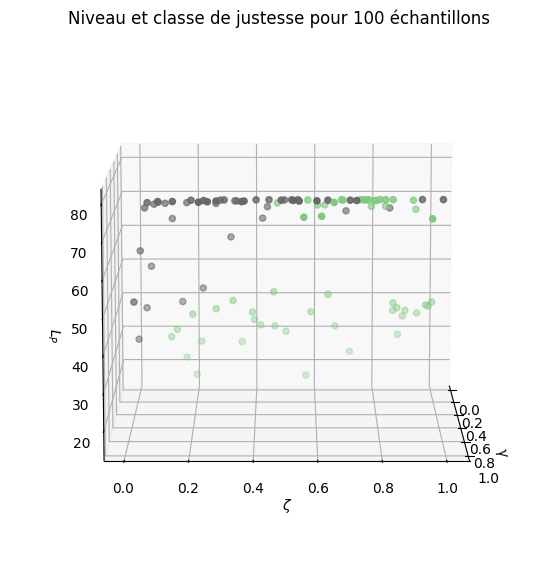

C:\Users\Lalie\AppData\Local\Temp\ipykernel_16152\1301281166.py:12: RuntimeWarning: divide by zero encountered in log10
  L_g = 20*np.log10((gammas)*P_M)


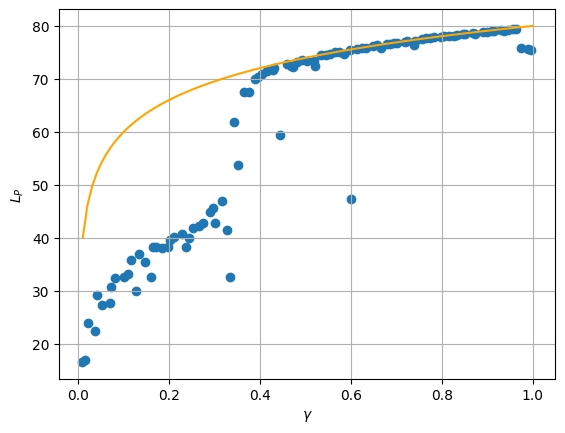

In [52]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], np.abs(D_niveau), c = C_justesse, cmap = "Accent")
ax.set_zlabel(r"$L_P$")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Niveau et classe de justesse pour " + str(n_data) + " échantillons")
ax.view_init(elev=10., azim=0, roll=0)
plt.show()

gammas = np.linspace(0,1,100)
L_g = 20*np.log10((gammas)*P_M)

plt.scatter(gamma[indexes[:,0]], D_niveau)
plt.plot(gammas, L_g, c = 'orange')
plt.xlabel(r"$\gamma$")
plt.ylabel(r"$L_P$")
plt.grid()
plt.show()

In [82]:
zeta_niveau = 0.44
D_niveau = np.zeros((len(L_liste), len(indexes)))
C_justesse = np.zeros((len(L_liste), len(indexes)))

for i in range(len(L_liste)) :
    print("epoch :", i + 1, "/", len(L_liste))
    for j, index in enumerate(indexes) : 
        #print("gamma :", j + 1, "/", len(indexes))
        P = simulation(T_sec, delta_t, gamma[index[0]], zeta_niveau, L_liste[i], P_M, Zc)
        D_niveau[i, j] = niveau(P)
        C_justesse[i, j] = class_justesse.classifieur_justesse(P)

epoch : 1 / 12
gamma : 1 / 100
gamma : 2 / 100
gamma : 3 / 100
gamma : 4 / 100
gamma : 5 / 100
gamma : 6 / 100
gamma : 7 / 100
gamma : 8 / 100
gamma : 9 / 100
gamma : 10 / 100
gamma : 11 / 100
gamma : 12 / 100
gamma : 13 / 100
gamma : 14 / 100
gamma : 15 / 100
gamma : 16 / 100
gamma : 17 / 100
gamma : 18 / 100
gamma : 19 / 100
gamma : 20 / 100
gamma : 21 / 100
gamma : 22 / 100
gamma : 23 / 100
gamma : 24 / 100
gamma : 25 / 100
gamma : 26 / 100
gamma : 27 / 100
gamma : 28 / 100
gamma : 29 / 100
gamma : 30 / 100
gamma : 31 / 100
gamma : 32 / 100
gamma : 33 / 100
gamma : 34 / 100
gamma : 35 / 100
gamma : 36 / 100
gamma : 37 / 100
gamma : 38 / 100
gamma : 39 / 100
gamma : 40 / 100
gamma : 41 / 100
gamma : 42 / 100
gamma : 43 / 100
gamma : 44 / 100
gamma : 45 / 100
gamma : 46 / 100
gamma : 47 / 100
gamma : 48 / 100
gamma : 49 / 100
gamma : 50 / 100
gamma : 51 / 100
gamma : 52 / 100
gamma : 53 / 100
gamma : 54 / 100
gamma : 55 / 100
gamma : 56 / 100
gamma : 57 / 100
gamma : 58 / 100
gamma : 

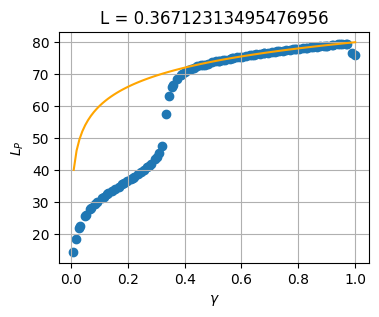

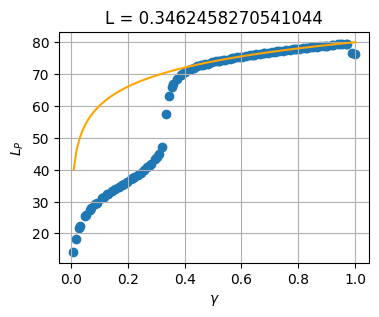

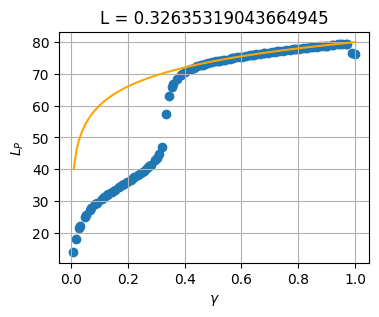

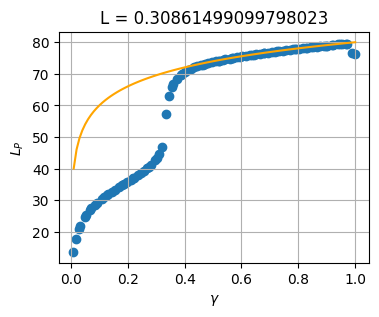

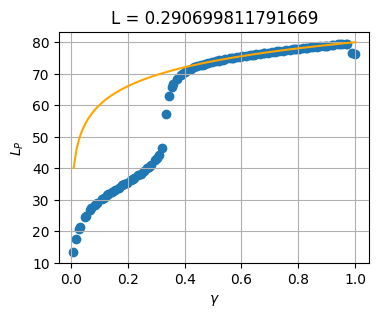

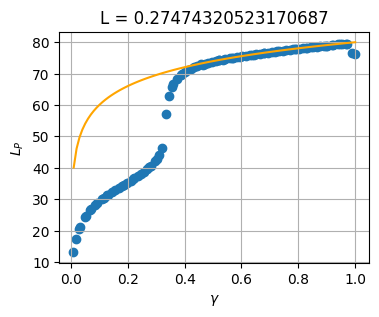

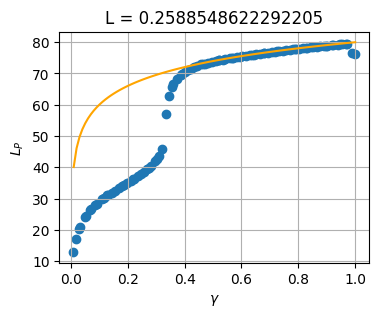

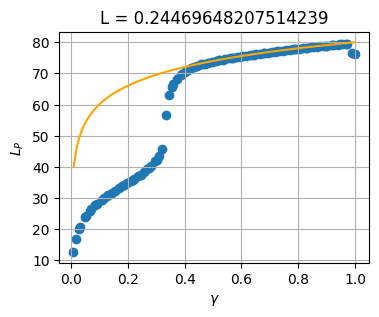

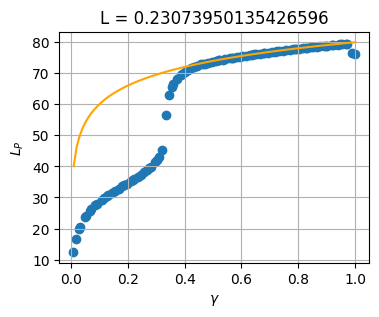

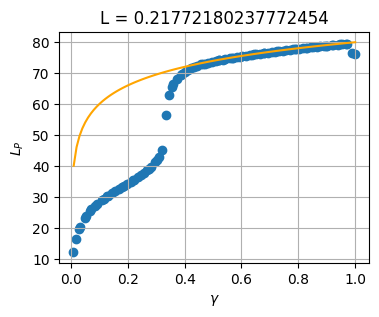

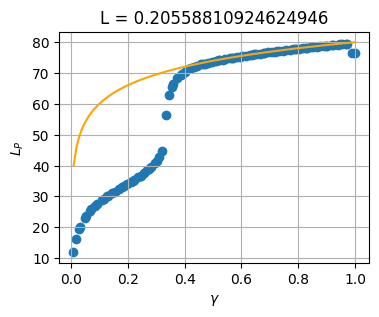

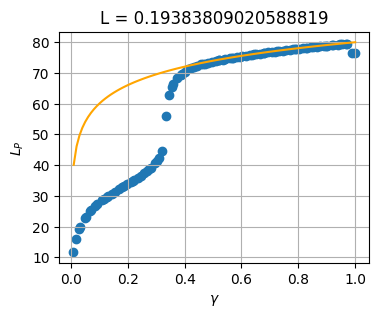

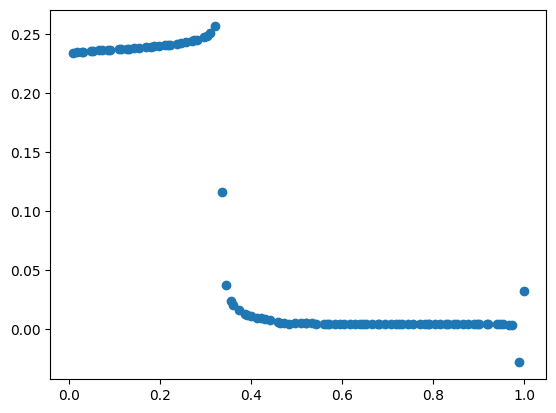

In [85]:
for n in range(len(L_liste)):
    plt.figure(figsize = (4, 3))
    plt.scatter(gamma[indexes[:,0]], D_niveau[n, :])
    plt.plot(gammas, L_g, c = 'orange')
    plt.xlabel(r"$\gamma$")
    plt.ylabel(r"$L_P$")
    plt.title("L = " + str(L_liste[n]))
    plt.grid()
    plt.show()

plt.scatter(gamma[indexes[:,0]], D_niveau[2, :]-D_niveau[3, :])

**Rugosité**

**Brillance**

regarder le centroïde spectral :

\begin{equation}
\mu_1 = \sum_{k=1}^K f_k . p_k
\end{equation}

(65536,) 65536 65536


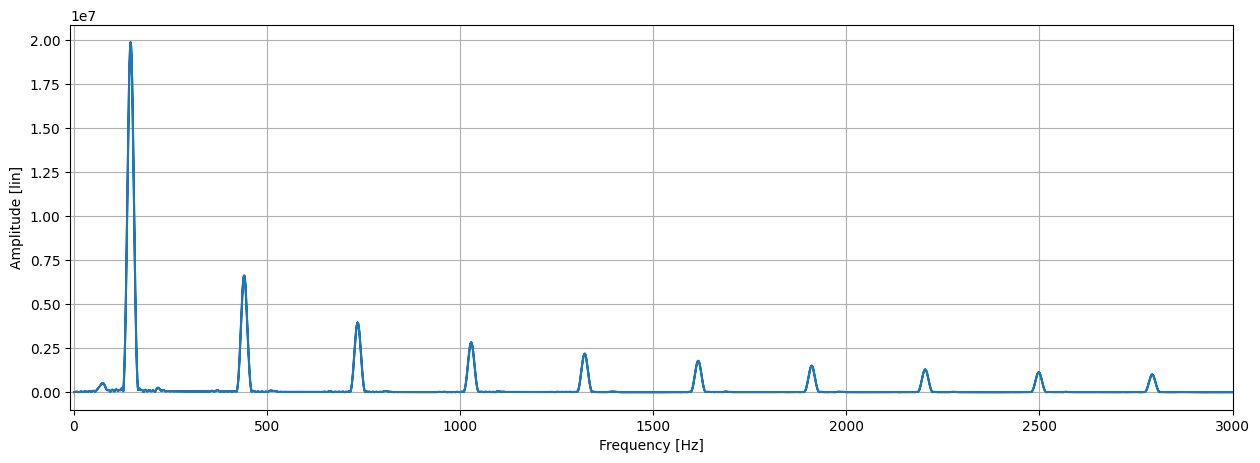

In [138]:
P = simulation(T_sec, delta_t, 0.66, 0.58, L, P_M, Zc)
fftFreq_hz_v, fftAmpl_v = F_getSpectreFromAudio(P, L_n, Nfft, fs, display = True)
_, _, f0 = F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, 4, 20, 2000, Nfft, fs)
print(fftAmpl_v.shape, len(fftFreq_hz_v), Nfft)


In [139]:
def banc_de_filtre(fftFreq_hz_v, f0, Nfft, H=20):
    """ 

    """
    filtre = np.zeros((Nfft, H))
    f_k = np.zeros(H)
    for h in range(1,H+1) :
        m = f0*h
        trame = np.zeros(Nfft)
        n_sup = np.argmin(np.abs(fftFreq_hz_v - m))
        n_min = np.argmin(np.abs(fftFreq_hz_v - (m-f0)))
        n_max = np.argmin(np.abs(fftFreq_hz_v - (m+f0)))
        trame[n_min:n_sup] = np.linspace(0,1, num = int(np.abs(n_sup-n_min)))
        trame[n_sup:n_max] = 1 - np.linspace(0,1, num = int(np.abs(n_sup-n_max)))
        norm = np.sum(trame)
        if norm>0:
            filtre[:,h-1] = trame/norm
        f_k[h-1] = fftFreq_hz_v[n_sup]
    return filtre, f_k

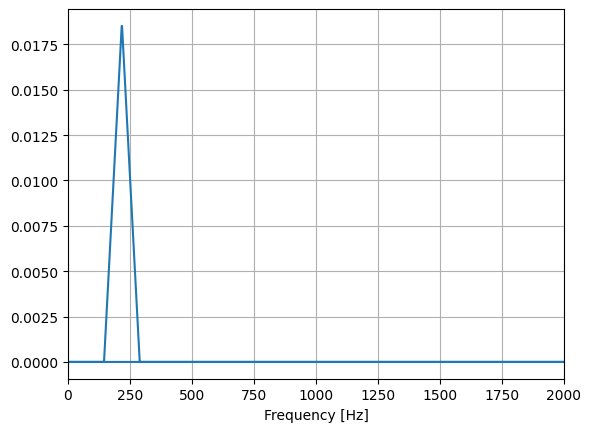

In [140]:
filtre, f_k = banc_de_filtre(fftFreq_hz_v, f0, Nfft, H=20)

for i in range(2, 3):
    plt.figure()
    plt.plot(fftFreq_hz_v, filtre[:, i])
    plt.xlabel('Frequency [Hz]')
    plt.xlim((0,2000))
    plt.grid(True)

In [141]:
def p_k(fftAmpl_v, filtre, H=20):
    """ 
    """
    a_k = np.zeros(H)
    for h in range(H):
        a_k[h] = np.sum(fftAmpl_v*filtre[:,h])
    p_k = a_k
    p_k = p_k/np.sum(p_k)
    return p_k

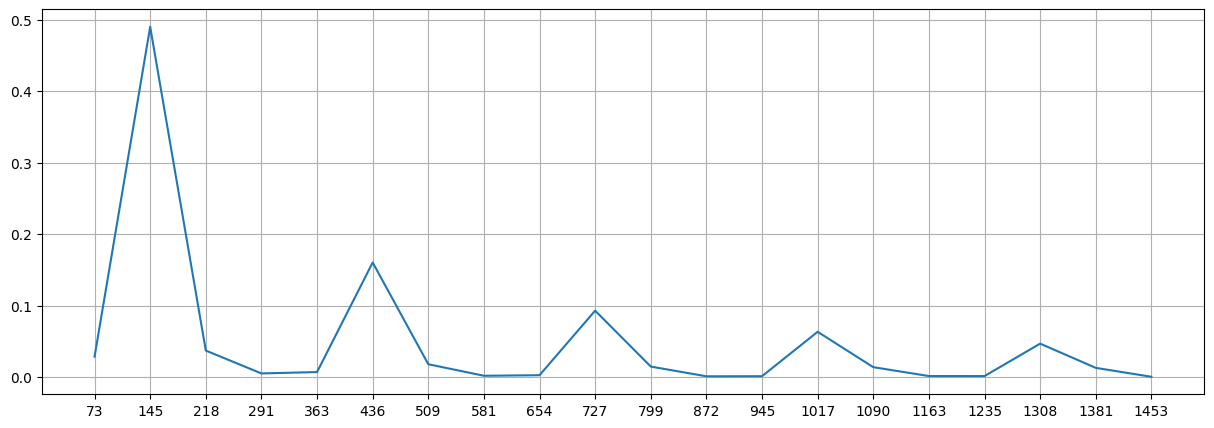

In [142]:
p = p_k(fftAmpl_v, filtre, H=20)

# for i in range(20):
#     plt.figure()
#     plt.plot(fftFreq_hz_v, fftAmpl_v*filtre[:,i])
#     plt.xlim((0,2000))
#     plt.show

plt.figure(figsize = (15,5))
plt.plot(f_k, p)
plt.xticks(f_k)
plt.grid()


In [143]:
def spec_centroid(p_k, f_k):
    mu = np.sum(p_k*f_k)
    return mu

In [144]:
D_centroid = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]], L, P_M, Zc)
    fftFreq_hz_v, fftAmpl_v = F_getSpectreFromAudio(P, L_n, Nfft, fs, display = False)
    p = p_k(fftAmpl_v, filtre, H=20)
    D_centroid[i] = spec_centroid(p, f_k)

epoch : 1 / 500
epoch : 2 / 500
epoch : 3 / 500
epoch : 4 / 500
epoch : 5 / 500
epoch : 6 / 500
epoch : 7 / 500
epoch : 8 / 500
epoch : 9 / 500
epoch : 10 / 500
epoch : 11 / 500
epoch : 12 / 500
epoch : 13 / 500
epoch : 14 / 500
epoch : 15 / 500
epoch : 16 / 500
epoch : 17 / 500
epoch : 18 / 500
epoch : 19 / 500
epoch : 20 / 500
epoch : 21 / 500
epoch : 22 / 500
epoch : 23 / 500
epoch : 24 / 500
epoch : 25 / 500
epoch : 26 / 500
epoch : 27 / 500
epoch : 28 / 500
epoch : 29 / 500
epoch : 30 / 500
epoch : 31 / 500
epoch : 32 / 500
epoch : 33 / 500
epoch : 34 / 500
epoch : 35 / 500
epoch : 36 / 500
epoch : 37 / 500
epoch : 38 / 500
epoch : 39 / 500
epoch : 40 / 500
epoch : 41 / 500
epoch : 42 / 500
epoch : 43 / 500
epoch : 44 / 500
epoch : 45 / 500
epoch : 46 / 500
epoch : 47 / 500
epoch : 48 / 500
epoch : 49 / 500
epoch : 50 / 500
epoch : 51 / 500
epoch : 52 / 500
epoch : 53 / 500
epoch : 54 / 500
epoch : 55 / 500
epoch : 56 / 500
epoch : 57 / 500
epoch : 58 / 500
epoch : 59 / 500
epoch 

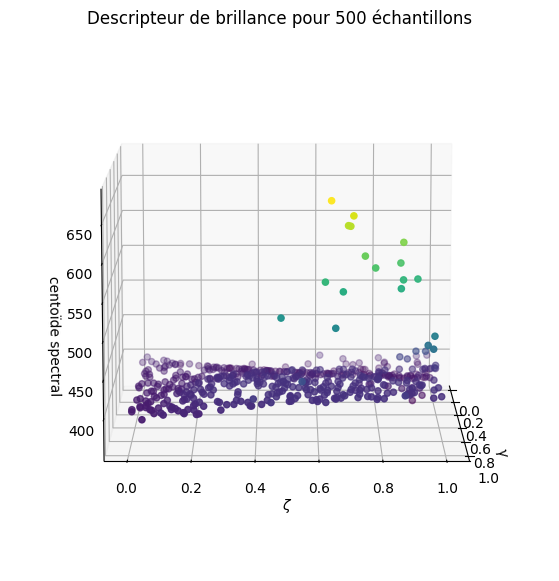

In [150]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], D_centroid, c = D_centroid, cmap = "viridis")
ax.set_zlabel(r"centoïde spectral")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Descripteur de brillance pour " + str(n_data) + " échantillons")
ax.view_init(elev=10., azim=0, roll=0)
plt.show()

# gammas = np.linspace(0,1,100)
# L_g = 20*np.log10(gammas*P_M)

# plt.scatter(gamma[indexes[:,0]], D_niveau)
# plt.plot(gammas, L_g, c = 'orange')
# plt.xlabel(r"$\gamma$")
# plt.ylabel(r"$L_P$")
# plt.grid()
# plt.show()

**Epaisseur ou largeur spectrale du son**

Spectral spread ou spectral std (l'étendue du prectre autour de sa valeur moyenne) :

\begin{equation}
\mu_2 = \left( \sum_{k=1}^K(f_k - \mu_1)^2 . p_k \right)^{1/2}
\end{equation}


In [147]:
def spec_spread(p_k, f_k) : 
    mu_1 = spec_centroid(p_k, f_k)
    mu_2 = np.sqrt(np.sum((f_k - mu_1)**2*p_k))
    return mu_2

In [148]:
D_spread = np.zeros(len(indexes))

for i, index in enumerate(indexes): 
    print("epoch :", i + 1, "/", n_data)
    P = simulation(T_sec, delta_t, gamma[index[0]],zeta[index[1]], L, P_M, Zc)
    fftFreq_hz_v, fftAmpl_v = F_getSpectreFromAudio(P, L_n, Nfft, fs, display = False)
    _, _, f0 = F_getF0FromSpectre(fftFreq_hz_v, fftAmpl_v, 4, 20, 2000, Nfft, fs)
    filtre, f_k = banc_de_filtre(fftFreq_hz_v, f0, Nfft, H=20)
    p = p_k(fftAmpl_v, filtre, H=20)
    D_spread[i] = spec_spread(f_k, p)

epoch : 1 / 500
epoch : 2 / 500
epoch : 3 / 500
epoch : 4 / 500
epoch : 5 / 500
epoch : 6 / 500
epoch : 7 / 500
epoch : 8 / 500
epoch : 9 / 500
epoch : 10 / 500
epoch : 11 / 500
epoch : 12 / 500
epoch : 13 / 500
epoch : 14 / 500
epoch : 15 / 500
epoch : 16 / 500
epoch : 17 / 500
epoch : 18 / 500
epoch : 19 / 500
epoch : 20 / 500
epoch : 21 / 500
epoch : 22 / 500
epoch : 23 / 500
epoch : 24 / 500
epoch : 25 / 500
epoch : 26 / 500
epoch : 27 / 500
epoch : 28 / 500
epoch : 29 / 500
epoch : 30 / 500
epoch : 31 / 500
epoch : 32 / 500
epoch : 33 / 500
epoch : 34 / 500
epoch : 35 / 500
epoch : 36 / 500
epoch : 37 / 500
epoch : 38 / 500
epoch : 39 / 500
epoch : 40 / 500
epoch : 41 / 500
epoch : 42 / 500
epoch : 43 / 500
epoch : 44 / 500
epoch : 45 / 500
epoch : 46 / 500
epoch : 47 / 500
epoch : 48 / 500
epoch : 49 / 500
epoch : 50 / 500
epoch : 51 / 500
epoch : 52 / 500
epoch : 53 / 500
epoch : 54 / 500
epoch : 55 / 500
epoch : 56 / 500
epoch : 57 / 500
epoch : 58 / 500
epoch : 59 / 500
epoch 

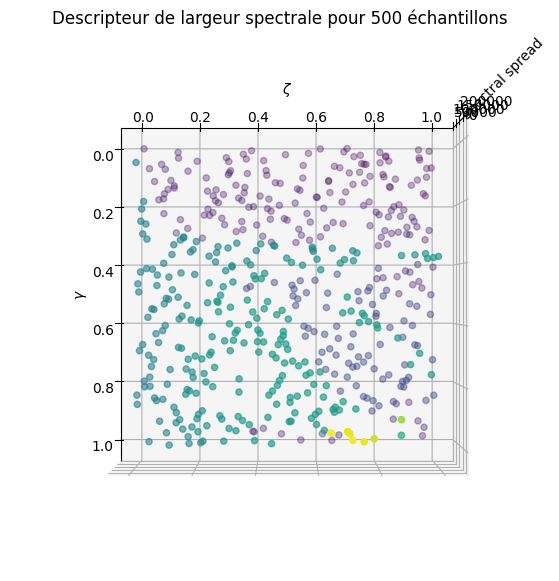

In [151]:
fig = plt.figure(figsize = (15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma[indexes[:,0]], zeta[indexes[:,1]], D_spread, c=D_spread, cmap = "viridis")
ax.set_zlabel(r"spectral spread")
ax.set_ylabel(r"$\zeta$")
ax.set_xlabel(r"$\gamma$")
ax.set_title("Descripteur de largeur spectrale pour " + str(n_data) + " échantillons")
ax.view_init(elev=90., azim=0, roll=0)
plt.show()

$a_k$ représente l'amplitude au bin $k$ de la STFT, au partiel harmonique $k=h$ ou au $k$ -ième filtre ERB. 

$f_k$ est la fréquence en Hz correspondant à $k$.

\begin{equation}
p_k = \frac{a_k}{\sum_{k=1}^K a_k}
\end{equation}

(131073, 8)
(131073,)
(8,)
8


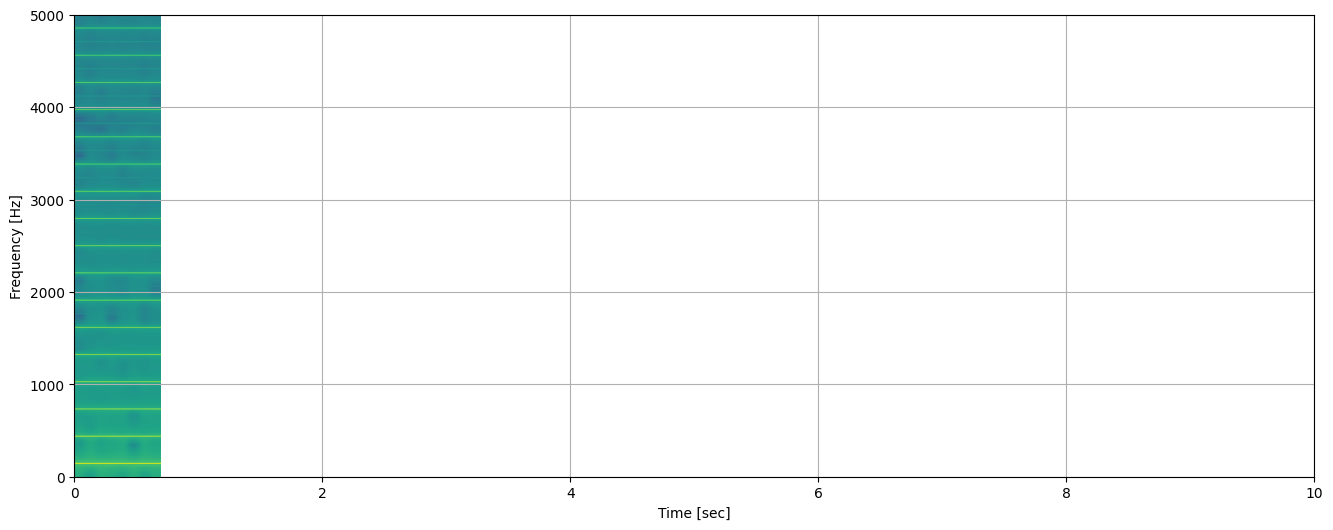

In [9]:
def F_nextpow2(i):
    """
    Find 2^n that is equal to or greater than.
    """
    N = 1
    while N < i:
        N *= 2
    return N

def F_get_stft(audio_v, sr_hz, L_sec):
    """
    description:
        compute the amplitude of the short-time-fourier-transform using a given window duration L_sec
    inputs:
        audio_v: audio signal data
        sr_hz: sampling rate of audio signal [in Hz]
        L_sec: duration of the analysis window [in second]
    outputs:
        am_fft_m (N/2+1, nb_frame): numpy matrix which stores the amplitude of the STFT
            (because of symetry we only keep the positive axis, hence N/2+1)
        freq_hz_v (N/2+1): numpy vector which stores the frequencies of the DFT [in Hz]
        time_sec_v (nb_frame): numpy vector which stores the middle-time positions of the STFT frames [in second]
    """

    L_n = int(sr_hz*L_sec)
    N = 8*F_nextpow2(L_n)
    N_hop = int(L_n/3)
    nb_frame = int(np.floor((len(audio_v) - L_n) / N_hop)) + 1
    am_fft_m = np.zeros((int(N/2+1), nb_frame))
    freq_hz_v = np.fft.rfftfreq(N, d=1/sr_hz)
    time_sec_v = np.zeros(nb_frame)
    for n in range(nb_frame) :
        start = n * N_hop
        if (start + L_n) < len(audio_v) - 1 : 
            end = start + L_n
        else :
            end = len(audio_v) - 1  
        trame = audio_v[start:end] * np.hamming(end-start)
        am_fft_m[:, n] = np.abs(np.fft.rfft(trame, N))
        time_sec_v[n] = (n*N_hop)/sr_hz

    return am_fft_m, freq_hz_v, time_sec_v, nb_frame

audio_v = simulation(T_sec, delta_t, 0.66, 0.48, L, P_M, Zc)
am_fft_m, freq_hz_v, time_sec_v, nb_frame = F_get_stft(audio_v, fs, L_sec=0.3)
print( am_fft_m.shape )
print( freq_hz_v.shape )
print( time_sec_v.shape )
print(nb_frame)

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.imshow( np.log(1+1e6*am_fft_m), aspect='auto', origin='lower', cmap='viridis', extent=(time_sec_v[0], time_sec_v[-1], freq_hz_v[0], freq_hz_v[-1]))
ax.set_xlabel('Time [sec]'), ax.set_ylabel('Frequency [Hz]')
ax.set_xlim((0, 10))
ax.set_ylim((0, 5e3))
plt.grid(True)